<br>

# Data Analytics - Homework1

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstname_Lastname_12345678_COMP47350_Homework1.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Friday, 8 March, 2019, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The problem and data come from a credit scoring company concerned with reducing credit repayment risk. The company wants to use the data collected about their customers to build a data analytics solution for credit risk prediction.
The fundamental task is to use the information about the applicant in their credit report to predict whether they will repay their credit within 2 years. The target variable to predict is a binary variable called RiskPerformance. The value “Bad” indicates that a consumer was 90 days past due or worse at least once over a period of 24 months from when the credit account was opened. The value “Good” indicates that they have made their payments without ever being more than 90 days overdue. The dataset we work with is a sample of the data used in this data challenge: https://community.fico.com/s/explainable-machine-learning-challenge?tabset-3158a=2

Each student will work with a different subset of the data. The CSV file is named using the format: **CreditRisk-[your-student-number].csv**, e.g., **CreditRisk-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                    The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion and justification will not receive full marks. 

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# (0). Background for the given data analytics problem and dataset.
Please check the PDF report "Data_Quality_Report_and_Plan_Initial_Findings.pdf" for background and important terminology for this problem.

In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('CreditRisk-18200143.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [3]:
df.shape

(1000, 24)

The dataset has 1000 entries with 24 features per entry.

### Print first and last 5 rows of CSV file

In [4]:
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,58,336,1,52,27,1,1,100,-7,...,29,1,2,2,34,63,6,4,3,63
1,Good,75,364,12,123,43,0,0,98,24,...,26,2,1,1,1,31,7,2,1,45
2,Bad,76,134,11,67,28,0,0,100,-7,...,21,-7,0,0,62,14,3,2,1,83
3,Good,88,330,9,127,22,0,0,100,-7,...,14,-8,0,0,4,-8,2,1,0,27
4,Good,76,160,5,55,15,0,0,100,-7,...,47,4,1,1,60,96,2,3,1,100


In [5]:
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Good,73,207,11,66,23,0,0,92,2,...,33,10,0,0,0,14,1,3,0,80
996,Good,80,193,5,61,38,0,0,95,17,...,16,0,1,1,34,-8,6,1,0,64
997,Good,80,57,2,39,6,0,0,100,-7,...,0,-7,0,0,36,-8,2,-8,0,40
998,Bad,56,75,17,50,20,1,0,90,31,...,14,0,6,6,59,-8,8,-8,4,71
999,Good,83,272,18,104,10,1,0,91,35,...,18,17,0,0,6,-8,1,-8,0,25


### Convert features to appropriate datatypes

In [6]:
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

Based on examining the data in a spreadsheet program, 3 of the features are categorical and the rest continuous.

- *RiskPerformance* will be converted to **categorical** because it contains only 2 possible values, true of false.
- *'MaxDelq2PublicRecLast12M'* column will be converted to **categorical** because it contains a finite set of possible values, *(0-9)*, each representing a different meaning, thus a different category.
- *'MaxDelqEver'* column will be converted to **categorical** because it contains a finite set of possible values, *(1-9)*, each representing a different meaning.

In [7]:
# Select columns containing categorical data
categorical_columns = df[['MaxDelq2PublicRecLast12M','MaxDelqEver','RiskPerformance']].columns
# MaxDelq2PublicRecLast12M and MaxDelqEver were chosen as categories because 
# the data contains single digit values each representing a different meaning

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_features = df.select_dtypes(['int64']).columns

df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden                 int64
NumRevolvingTradesWBalance               int64
NumInstallTra

Converted *RiskPerformance*, *'MaxDelq2PublicRecLast12M'* & *'MaxDelqEver'* to categorical type.

### Check for duplicate row/columns

In [8]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  55
Number of duplicate rows (including first) in the table is: 57


In [9]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset (id or customer number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 54 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. Displaying these rows in a dataframe I see they include the value -9 for all attributes. This is a special value meaning "No Bureau Record or No Investigation" information is available. These rows can be safely dropped as they add no information.
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

#### Duplicate rows can be seen below

In [10]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
19,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
24,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
47,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
59,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
66,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
70,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
89,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
102,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
108,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
110,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [11]:
# Check for duplicate rows and columns in this toy df that atually has duplicated rows and columns, 
#to check the duplicate checks work correctly
toy_duplicates_df = df[df.duplicated(keep=False)].iloc[:,0:5].head()
toy_duplicates_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile
19,Bad,-9,-9,-9,-9
24,Good,-9,-9,-9,-9
47,Good,-9,-9,-9,-9
59,Bad,-9,-9,-9,-9
66,Bad,-9,-9,-9,-9


In [12]:
print('Number of duplicate (excluding first) rows in the toy table is: ', toy_duplicates_df.duplicated().sum())
print('Number of duplicate rows (including first) in the toy table is:', toy_duplicates_df[toy_duplicates_df.duplicated(keep=False)].shape[0])

#transpose the toy df
toy_duplicates_dfT = toy_duplicates_df.T
print("\nNumber of duplicate (excluding first) columns in the toy table is: ", toy_duplicates_dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the toy table is: ",  toy_duplicates_dfT[toy_duplicates_dfT.duplicated(keep=False)].shape[0])



Number of duplicate (excluding first) rows in the toy table is:  3
Number of duplicate rows (including first) in the toy table is: 5

Number of duplicate (excluding first) columns in the toy table is:  3
Number of duplicate (including first) columns in the toy table is:  4


#### The duplicate checks seems to be working as expected.

Duplicate rows will now be dropped from the original data frame.

In [13]:
df = df.drop_duplicates(keep=False)
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


### Check for constant columns

In [14]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,943,2,Bad,508
MaxDelq2PublicRecLast12M,943,9,7,386
MaxDelqEver,943,7,8,419


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1
- *RiskPerformance* has 2 unique values
- *MaxDelq2PublicRecLast12M* has 8 unique values
- *MaxDelqEver* has 7 unique values

In [15]:
# Print table with continuous statistics
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,943.0,71.110286,10.501467,-9.0,64.0,70.0,79.0,93.0
MSinceOldestTradeOpen,943.0,192.361612,102.616097,-8.0,126.5,180.0,254.0,789.0
MSinceMostRecentTradeOpen,943.0,9.058324,10.537860,0.0,3.0,6.0,11.0,84.0
AverageMInFile,943.0,75.889714,32.962543,4.0,53.0,74.0,95.0,217.0
NumSatisfactoryTrades,943.0,21.740191,12.187989,1.0,13.0,20.0,29.0,78.0
NumTrades60Ever2DerogPubRec,943.0,0.605514,1.283263,0.0,0.0,0.0,1.0,14.0
NumTrades90Ever2DerogPubRec,943.0,0.402969,1.050160,0.0,0.0,0.0,0.0,14.0
PercentTradesNeverDelq,943.0,92.230117,11.515662,33.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,943.0,7.829268,20.780255,-8.0,-7.0,1.0,15.5,82.0
NumTotalTrades,943.0,23.406151,13.393737,0.0,14.0,22.0,31.0,100.0


**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

### Check for Null Values

In [16]:
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

- Result - No null values directly in the spreadsheet, but we will check carefully if Null values are not coded differently in this dataset. It could be that data is missing but it was not coded as Null in the original dataset.

### Check for Irregular cardinalities & permitted values

In [17]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\nMax deliquency in last 12 months:", pd.unique(df["MaxDelq2PublicRecLast12M"].ravel()))
print("Max delinquency ever:", pd.unique(df["MaxDelqEver"].ravel()))
print("Risk performance:", pd.unique(df["RiskPerformance"].ravel()))

Unique values for:
Max deliquency in last 12 months: [0 6 7 4 3 5 1 9 2]
Max delinquency ever: [8 6 3 4 5 7 2]
Risk performance: ['Bad' 'Good']


There are no irregular cardinalities. The values that appear seem to be in the permitted range.

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [18]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")



ExternalRiskEstimate
----------

Range ExternalRiskEstimate is:  102
----------
Value  Number of Instances
65    37
66    37
68    36
76    35
70    34
64    34
69    34
82    32
77    31
63    31
67    31
61    29
80    29
60    28
73    28
Name: ExternalRiskEstimate, dtype: int64 



MSinceOldestTradeOpen
----------

Range MSinceOldestTradeOpen is:  797
----------
Value  Number of Instances
-8      17
 150    12
 188    11
 102     9
 195     9
 176     9
 180     8
 153     8
 132     8
 143     8
 263     8
 221     7
 206     7
 194     7
 193     7
Name: MSinceOldestTradeOpen, dtype: int64 



MSinceMostRecentTradeOpen
----------

Range MSinceMostRecentTradeOpen is:  84
----------
Value  Number of Instances
3     114
2     107
4      85
6      79
5      74
1      70
9      48
7      47
8      43
11     27
12     22
13     21
17     19
10     19
14     18
Name: MSinceMostRecentTradeOpen, dtype: int64 



AverageMInFile
----------

Range AverageMInFile is:  213
----------
Value  Nu

In [19]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

ExternalRiskEstimate                 45
MSinceOldestTradeOpen                352
MSinceMostRecentTradeOpen            55
AverageMInFile                       160
NumSatisfactoryTrades                63
NumTrades60Ever2DerogPubRec          12
NumTrades90Ever2DerogPubRec          10
PercentTradesNeverDelq               47
MSinceMostRecentDelq                 80
NumTotalTrades                       69
NumTradesOpeninLast12M               14
PercentInstallTrades                 82
MSinceMostRecentInqexcl7days         26
NumInqLast6M                         16
NumInqLast6Mexcl7days                16
NetFractionRevolvingBurden           108
NetFractionInstallBurden             97
NumRevolvingTradesWBalance           22
NumInstallTradesWBalance             14
NumBank2NatlTradesWHighUtilization   14
PercentTradesWBalance                75


**Running Assessment:**
<br><br>

-  Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed below may contain significant outliers. This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms and boxplots, below.
<br>

 -  NumTrades60Ever2DerogPubRec
 -  NumTrades90Ever2DerogPubRec
 -  MSinceMostRecentDelq
 -  NumTotalTrades
 -  MSinceMostRecentInqexcl7days 
<br><br>

-  It is clear from both visual analysis of the rows and from this initial descriptive analysis that -7 and -8 are also special values in the original data.
<br><br>

 -  Examining the gaps / relationships between the minimum first quartile ranges, it is evident that these special values are left-skewing the data.
 
 **Action:**
<br><br>

-  We shall count the instances of each special feature for each value, and express the count as a percentage of the total values for that feature.

In [20]:
# For each continuous feature, print the number of occurrences of the remaining special values, 
# and the percentage of the features total values that they represent.

print("SPECIAL VALUE COUNT\n---------------")

for col in continuous_features:
    print("Feature:", col, "\t")
    print(len(df[df[col] == -8.0]), "occurrences of -8 special value ( = ", round((((len(df[df[col] == -8.0]))/ len(df[col]))*100), 2), "% of values)")
    print(len(df[df[col] == -7.0]), "occurrences of -7 special value ( = ", round((((len(df[df[col] == -7.0]))/ len(df[col]))*100), 2), "% of values)")
    print("\n\n")



SPECIAL VALUE COUNT
---------------
Feature: ExternalRiskEstimate 	
0 occurrences of -8 special value ( =  0.0 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: MSinceOldestTradeOpen 	
17 occurrences of -8 special value ( =  1.8 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: MSinceMostRecentTradeOpen 	
0 occurrences of -8 special value ( =  0.0 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: AverageMInFile 	
0 occurrences of -8 special value ( =  0.0 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: NumSatisfactoryTrades 	
0 occurrences of -8 special value ( =  0.0 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: NumTrades60Ever2DerogPubRec 	
0 occurrences of -8 special value ( =  0.0 % of values)
0 occurrences of -7 special value ( =  0.0 % of values)



Feature: NumTrades90Ever2DerogPubRec 	
0 occurrences of -8 special value 

**Running Assessment:**

-  We shall take note of this data quality issue and address it in the Data Quality Plan.
-  We shall continue to visually represent the data as it stands.
-  We expect some of the results to be skewed because of the negative, special values. 
We shall retain this original representation of the data for further comparison and documentation.

The meanings of the additional special values are as follows:
<br><br>

-  "-8 No Usable/Valid Accounts Trades or Inquiries"
-  "-7 Condition not Met (e.g. No Inquiries, No Delinquencies) "
 -  Source: https://community.fico.com/s/explainable-machine-learning-challenge?tabset-3158a=413df

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1 Check if any entries have number of satisfactory trades > than number of total trades (impossible)

In [21]:
test_1 = df[['NumSatisfactoryTrades','NumTotalTrades']][df['NumSatisfactoryTrades']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  67


,NumSatisfactoryTrades,NumTotalTrades
13,34,25
36,44,36
38,28,15
44,34,23
72,27,17


 - Test 2 Check if any entries have number of enquiries in last 6 months excluding last 7 days > number of enquiries in last 6 months (impossible)

In [22]:
test_2 = df[['NumInqLast6M','NumInqLast6Mexcl7days']][df['NumInqLast6Mexcl7days']>df['NumInqLast6M']]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Number of rows failing the test:  0


,NumInqLast6M,NumInqLast6Mexcl7days


- Test 3 Check if any entries have number trades open in last 12 months > number of total trades (impossible)

In [23]:
test_3 = df[['NumTradesOpeninLast12M','NumTotalTrades']][df['NumTradesOpeninLast12M']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Number of rows failing the test:  10


,NumTradesOpeninLast12M,NumTotalTrades
150,3,0
306,3,2
326,4,2
393,2,0
403,2,0


 - Test 4 Check if any entries have number trades 90 days late > number of total trades 60 days late (impossible)

In [24]:
test_4 = df[['NumTrades90Ever2DerogPubRec','NumTrades60Ever2DerogPubRec']][df['NumTrades90Ever2DerogPubRec']>df['NumTrades60Ever2DerogPubRec']]
print("Number of rows failing the test: ", test_4.shape[0])
test_4

Number of rows failing the test:  0


,NumTrades90Ever2DerogPubRec,NumTrades60Ever2DerogPubRec


- Test 5 Check if any entries have number trades 90 days late > number of total trades (impossible)

In [25]:
test_5 = df[['NumTrades90Ever2DerogPubRec','NumTotalTrades']][df['NumTrades90Ever2DerogPubRec']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head(5)

Number of rows failing the test:  5


,NumTrades90Ever2DerogPubRec,NumTotalTrades
254,8,5
305,2,1
662,1,0
694,1,0
959,6,3


 - Test 6 Check if any entries have value for number months since most recent trade > number months since oldest trade (impossible)

In [26]:
test_6 = df[['MSinceMostRecentTradeOpen','MSinceOldestTradeOpen']][df['MSinceMostRecentTradeOpen']>df['MSinceOldestTradeOpen']]
print("Number of rows failing the test: ", test_6.shape[0])
test_6.head(5)

Number of rows failing the test:  18


,MSinceMostRecentTradeOpen,MSinceOldestTradeOpen
67,3,-8
150,6,-8
200,50,-8
283,14,-8
305,83,59


Note: Many of these failures are due to -8 special value which will be handled in the next section

- Test 7 Check if any entries have number revolving trades with balance > number total trades (impossible)

In [27]:
test_7 = df[['NumRevolvingTradesWBalance','NumTotalTrades']][df['NumRevolvingTradesWBalance']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_7.shape[0])
test_7.head(5)

Number of rows failing the test:  15


,NumRevolvingTradesWBalance,NumTotalTrades
150,2,0
306,3,2
393,1,0
403,4,0
414,1,0


 - Test 8 Check if any entries have number install trades with balance > number total trades (impossible)

In [28]:
test_8 = df[['NumInstallTradesWBalance','NumTotalTrades']][df['NumInstallTradesWBalance']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_8.shape[0])
test_8.head(5)

Number of rows failing the test:  14


,NumInstallTradesWBalance,NumTotalTrades
150,2,0
230,3,2
305,2,1
326,3,2
393,1,0


- Test 9 check if any entries have number bank trades with high utilization > number total trades (impossible)

In [29]:
test_9 = df[['NumBank2NatlTradesWHighUtilization','NumTotalTrades']][df['NumBank2NatlTradesWHighUtilization']>df['NumTotalTrades']]
print("Number of rows failing the test: ", test_9.shape[0])
test_9.head(5)

Number of rows failing the test:  3


,NumBank2NatlTradesWHighUtilization,NumTotalTrades
662,1,0
946,2,0
992,1,0


 - Test 10 Check for entries that have no trades but entry for months since trade open (impossible)

In [30]:
test_10 = df[['NumTotalTrades','MSinceMostRecentTradeOpen']][df['NumTotalTrades']==0][df["MSinceMostRecentTradeOpen"]>=0]
print("Number of rows failing the test: ", test_10.shape[0])
test_10.head(5)

Number of rows failing the test:  9


,NumTotalTrades,MSinceMostRecentTradeOpen
150,0,6
393,0,8
403,0,4
414,0,7
662,0,6


 -  Test 11 Check for % trades never delinquent == 100% and have a trade over 60 days late (impossible)

In [31]:
test_11 = df[['PercentTradesNeverDelq','NumTrades60Ever2DerogPubRec']][df['PercentTradesNeverDelq']==100][df["NumTrades60Ever2DerogPubRec"]>0]
print("Number of rows failing the test: ", test_11.shape[0])
test_11.head(5)

Number of rows failing the test:  36


,PercentTradesNeverDelq,NumTrades60Ever2DerogPubRec
0,100,1
80,100,1
115,100,1
123,100,1
133,100,1


 -  Test 12 Check for % trades never delinquent < 100% and have no trade over 60 days late (impossible)
      - Check with domain expert - we do not have any feature for number of trades 30 days late which could account for this. No action will be taken as there are too many rows effected 

In [32]:
test_12 = df[['PercentTradesNeverDelq','NumTrades60Ever2DerogPubRec']][df['PercentTradesNeverDelq']<100][df["NumTrades60Ever2DerogPubRec"]==0]
print("Number of rows failing the test: ", test_12.shape[0])
test_12.head(5)

Number of rows failing the test:  247


,PercentTradesNeverDelq,NumTrades60Ever2DerogPubRec
1,98,0
7,98,0
15,96,0
27,86,0
28,71,0


 -  Test 13 Check for months since most recent delinquency == 0 (i.e. just delinquent) and have no trade over 60 days late (impossible)

In [33]:
test_13 = df[['MSinceMostRecentDelq','NumTrades60Ever2DerogPubRec']][df['MSinceMostRecentDelq']==0][df["NumTrades60Ever2DerogPubRec"]==0]
print("Number of rows failing the test: ", test_13.shape[0])
test_13.head(5)

Number of rows failing the test:  5


,MSinceMostRecentDelq,NumTrades60Ever2DerogPubRec
35,0,0
335,0,0
654,0,0
869,0,0
938,0,0


### - Save updated/cleaned data frame to a new csv file.

In [34]:
# Write the dataframe to a csv file
df.to_csv('CreditRisk_1-1_cleaned.csv', index=False)

### - Prepare a table with descriptive statistics for all the continuous features.

In [35]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,943.0,71.110286,10.501467,-9.0,64.0,70.0,79.0,93.0
MSinceOldestTradeOpen,943.0,192.361612,102.616097,-8.0,126.5,180.0,254.0,789.0
MSinceMostRecentTradeOpen,943.0,9.058324,10.537860,0.0,3.0,6.0,11.0,84.0
AverageMInFile,943.0,75.889714,32.962543,4.0,53.0,74.0,95.0,217.0
NumSatisfactoryTrades,943.0,21.740191,12.187989,1.0,13.0,20.0,29.0,78.0
NumTrades60Ever2DerogPubRec,943.0,0.605514,1.283263,0.0,0.0,0.0,1.0,14.0
NumTrades90Ever2DerogPubRec,943.0,0.402969,1.050160,0.0,0.0,0.0,0.0,14.0
PercentTradesNeverDelq,943.0,92.230117,11.515662,33.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,943.0,7.829268,20.780255,-8.0,-7.0,1.0,15.5,82.0
NumTotalTrades,943.0,23.406151,13.393737,0.0,14.0,22.0,31.0,100.0


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [36]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [37]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
RiskPerformance,943,2,Bad,508
MaxDelq2PublicRecLast12M,943,9,7,386
MaxDelqEver,943,7,8,419


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [38]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms summary sheet for all the continuous features.

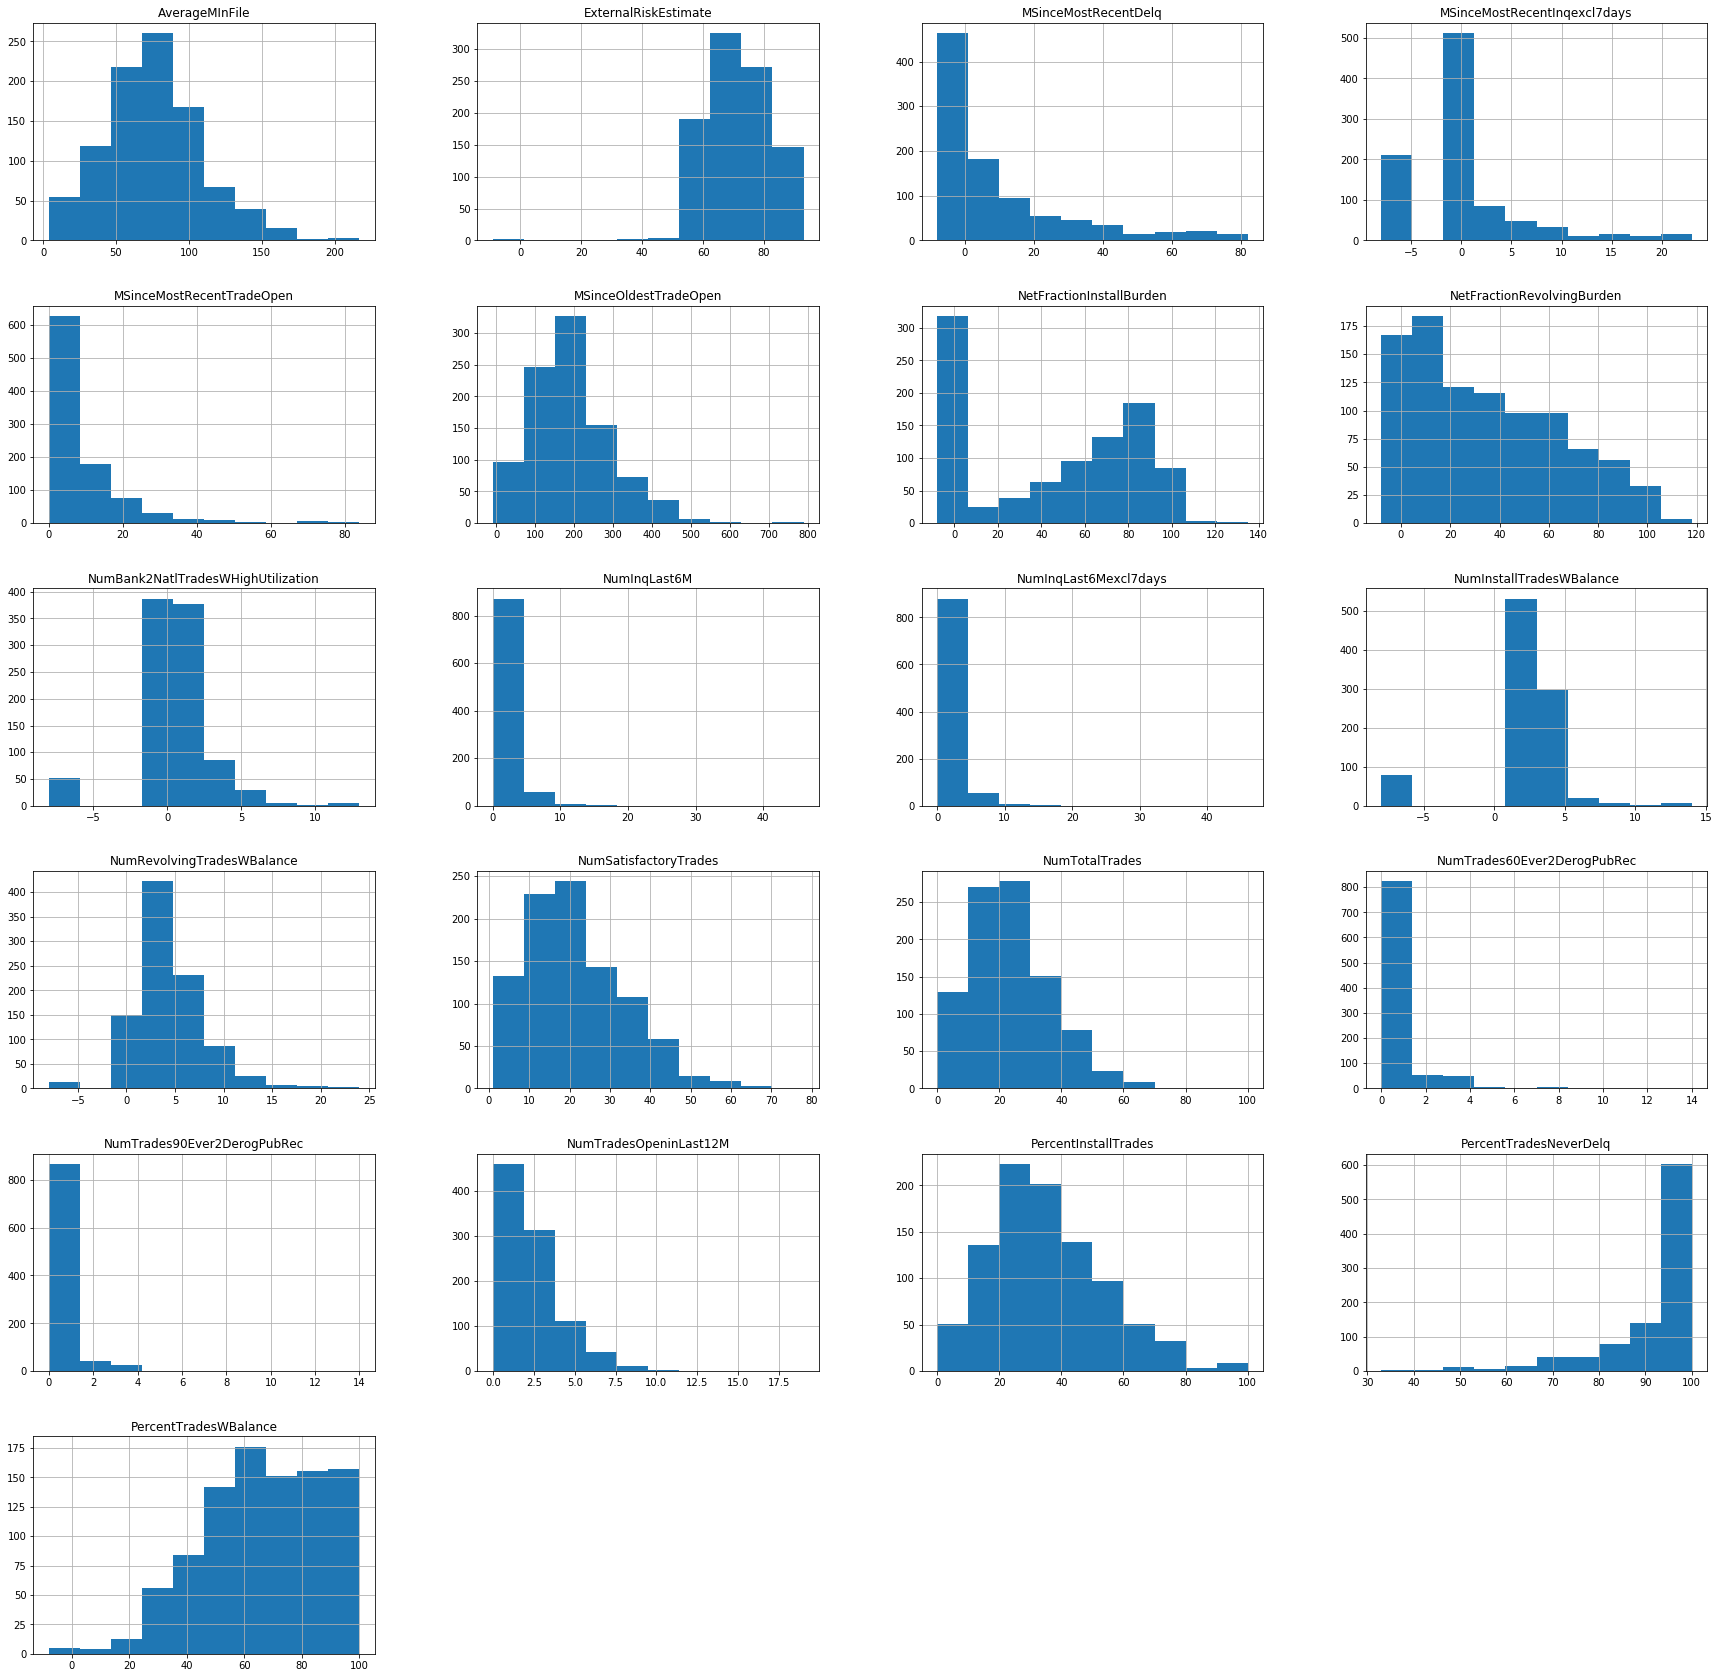

In [39]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

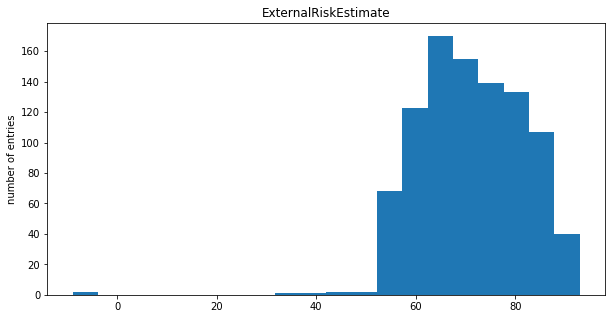

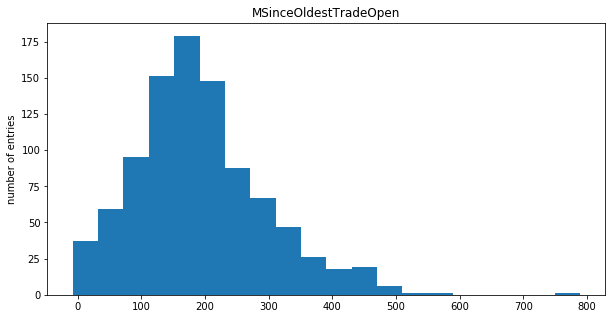

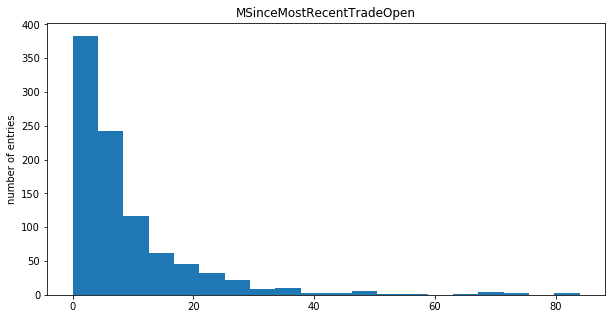

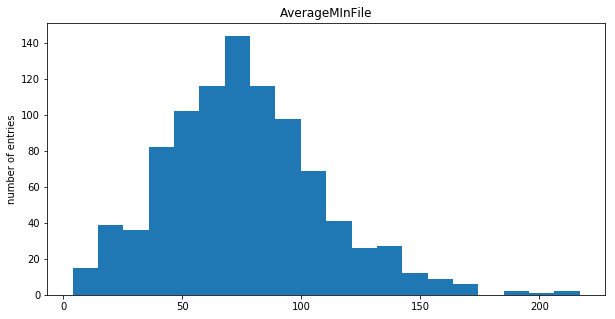

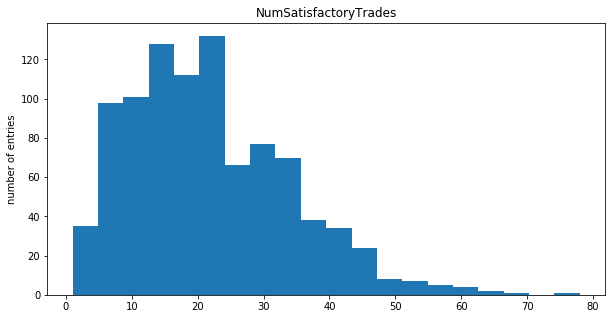

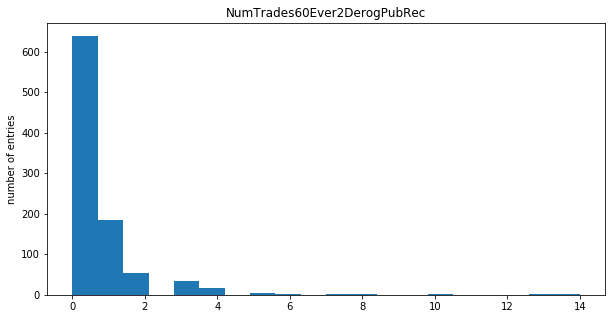

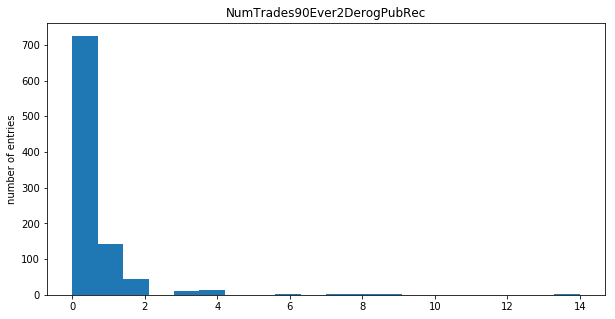

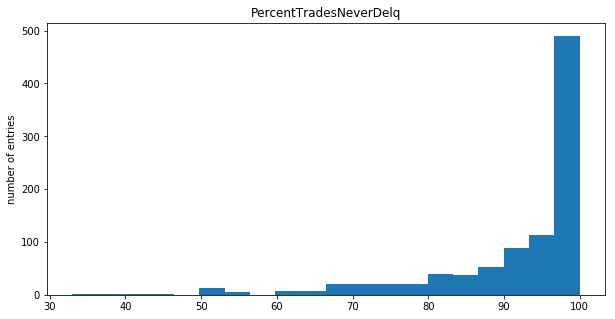

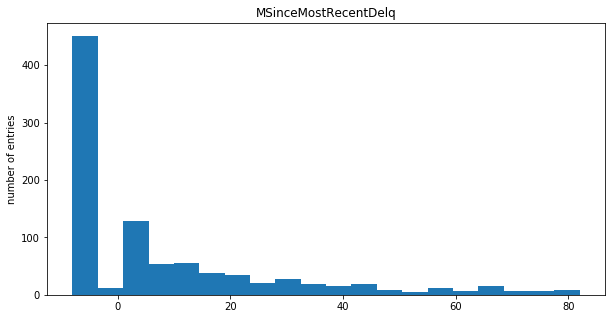

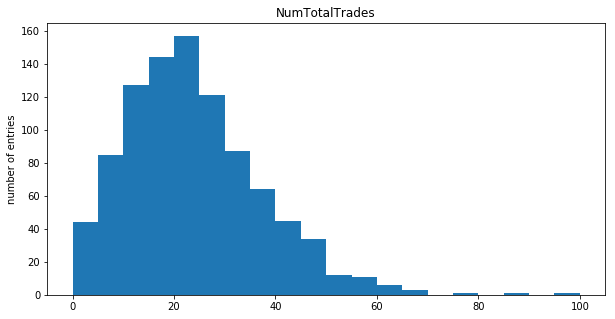

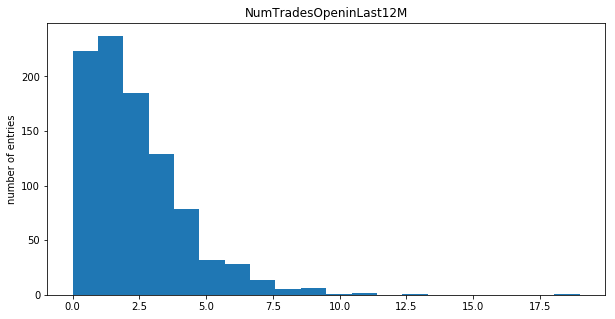

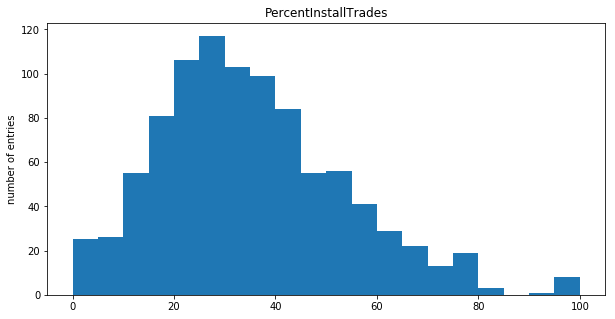

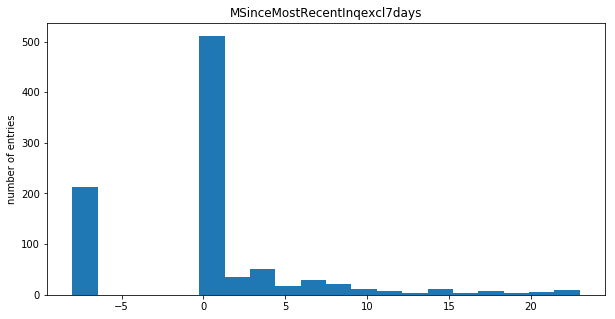

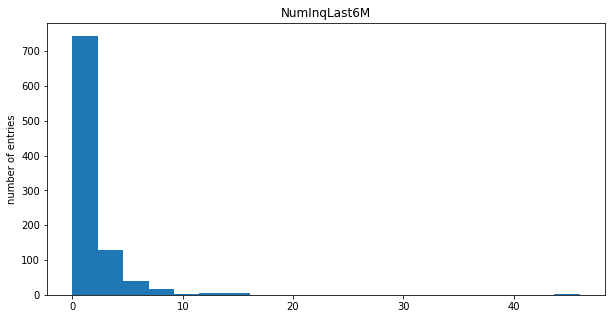

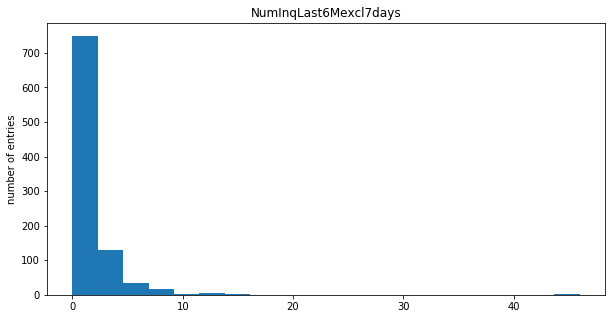

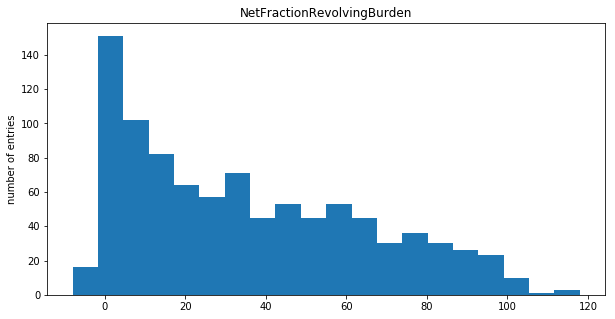

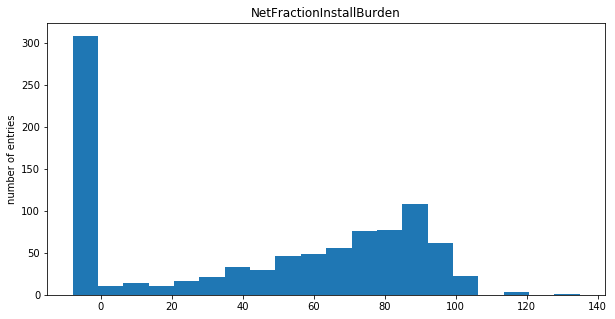

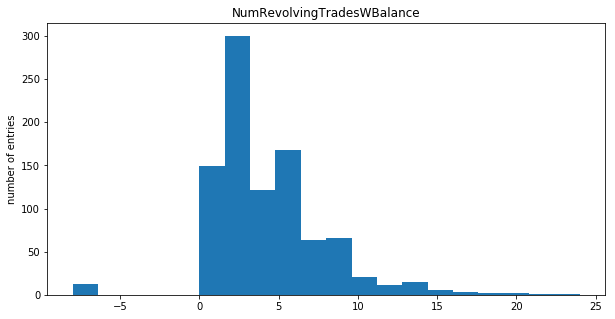

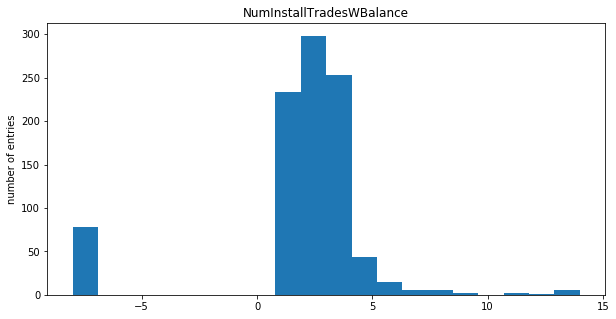

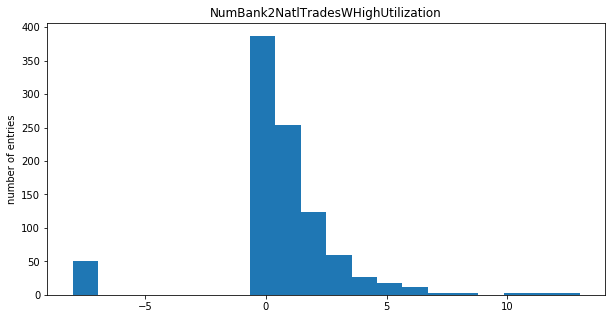

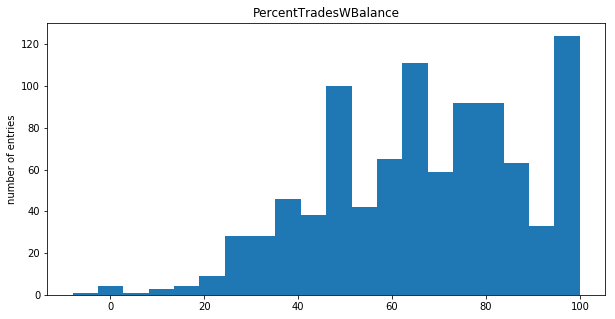

In [40]:
for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

### - Plot box plots summary sheet for all the continuous features.

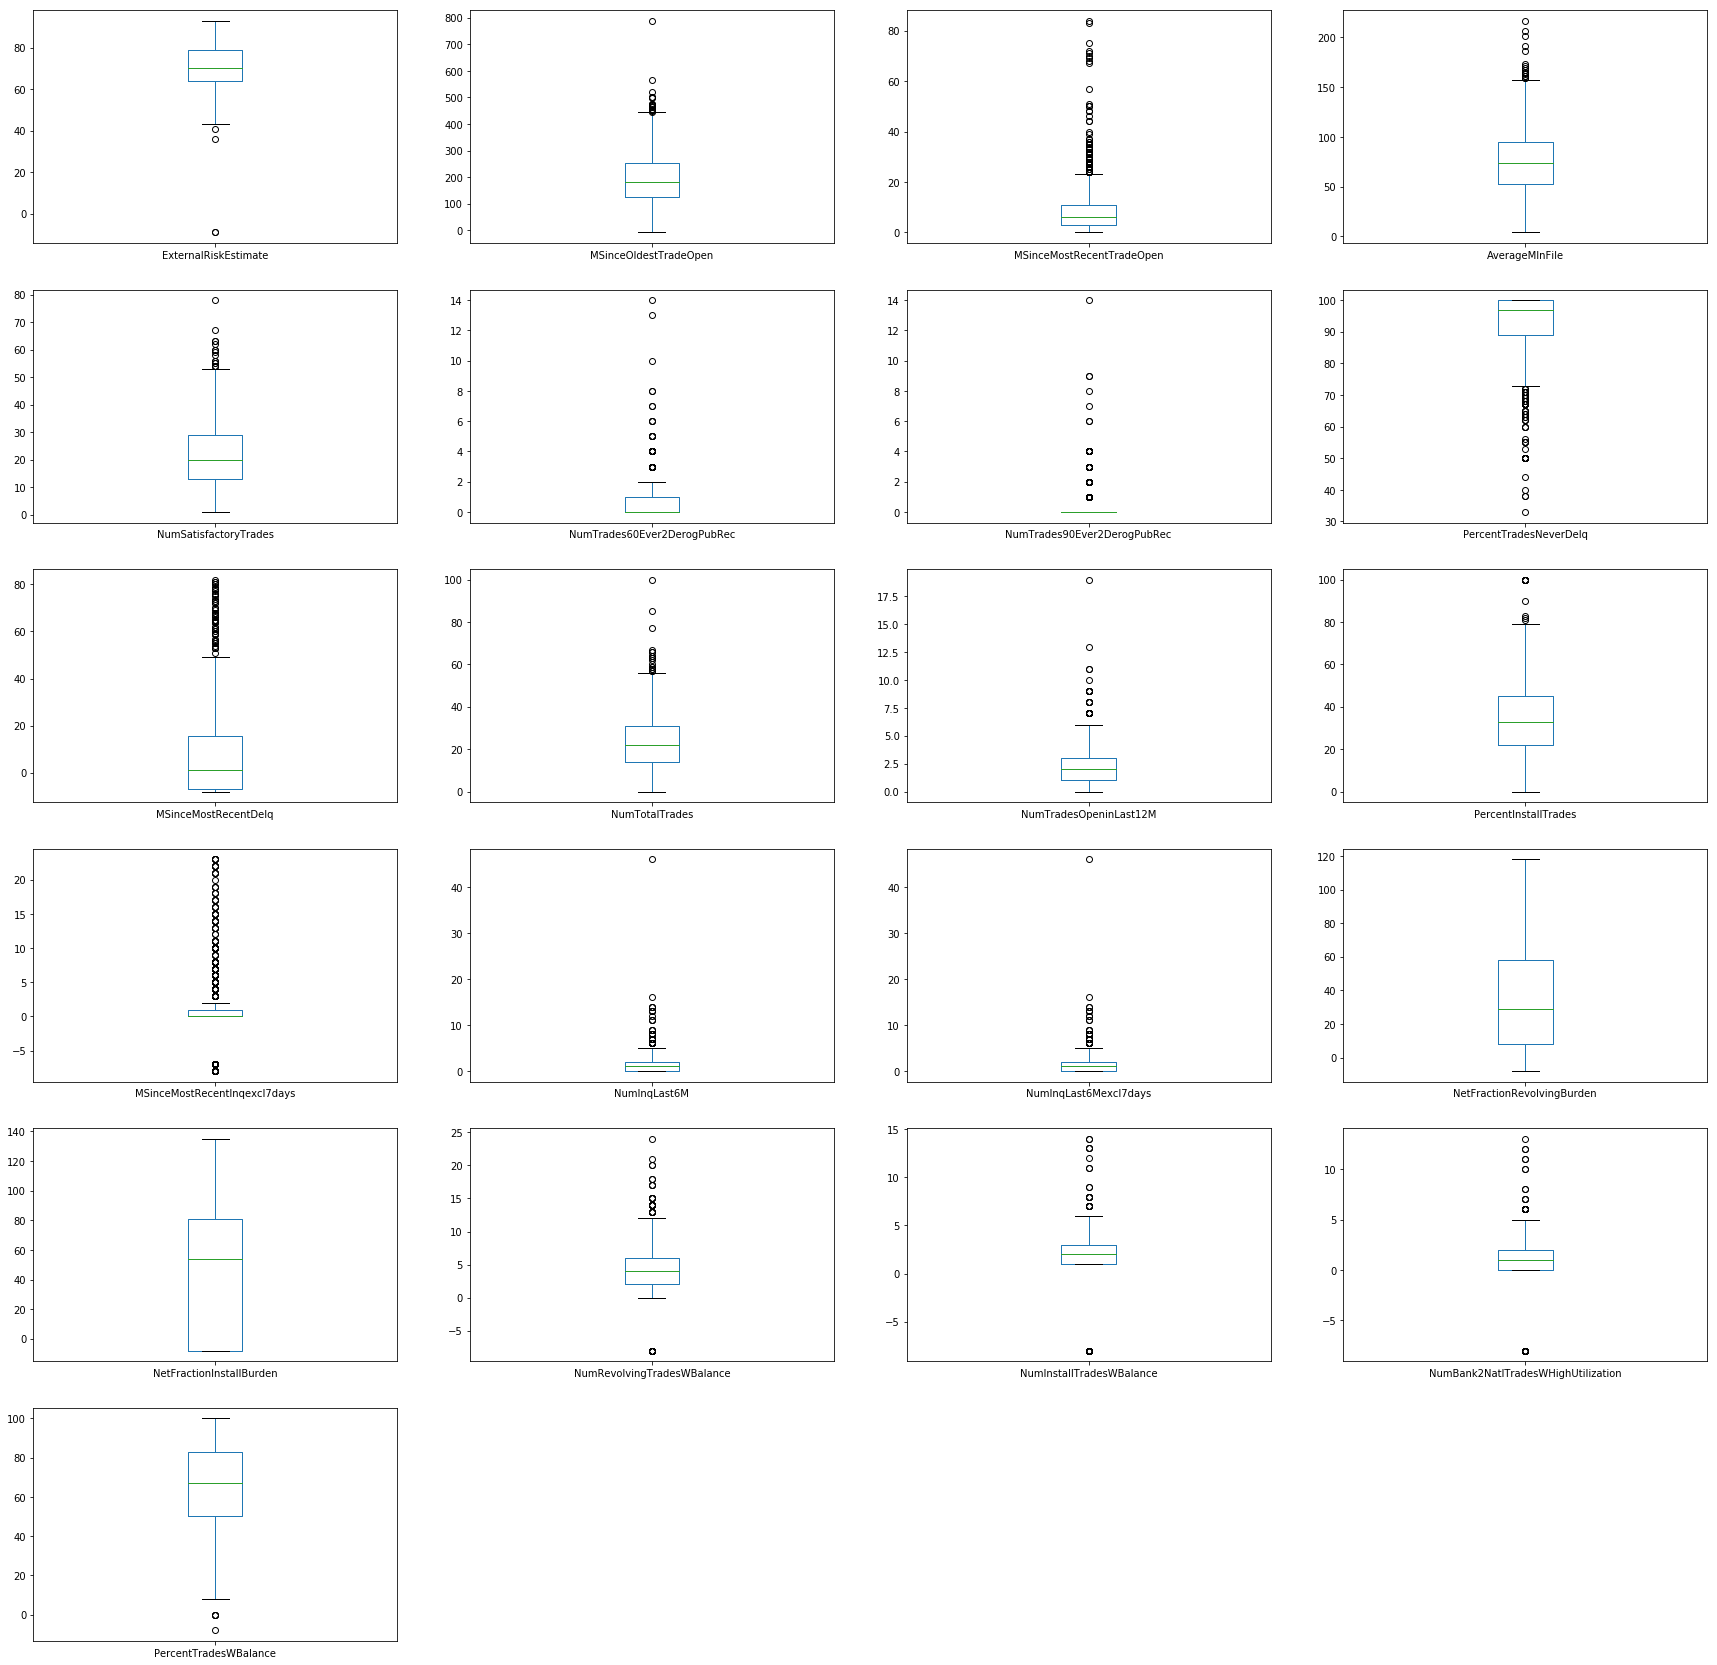

In [41]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots__summary1-1.pdf')

### - Plot box plots individual sheet for all the continuous features.

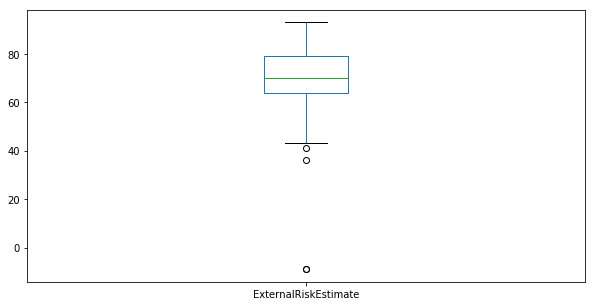

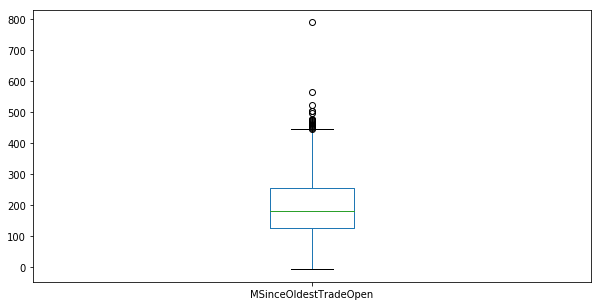

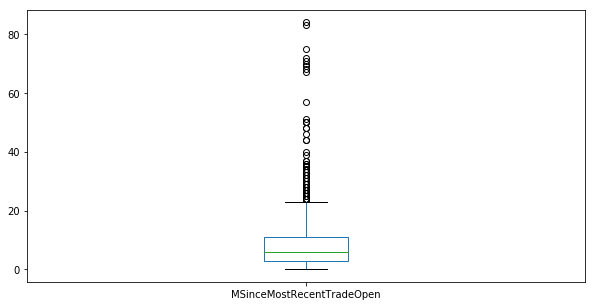

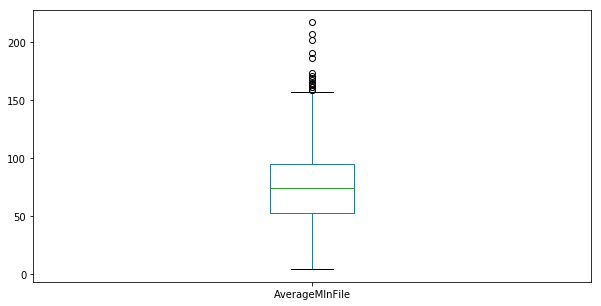

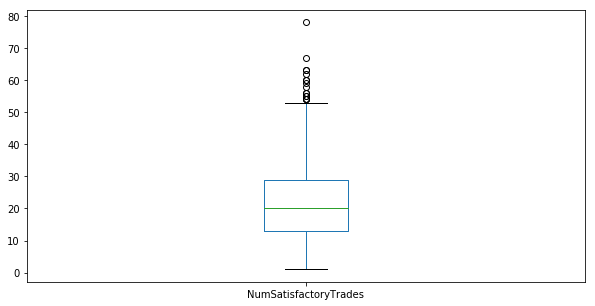

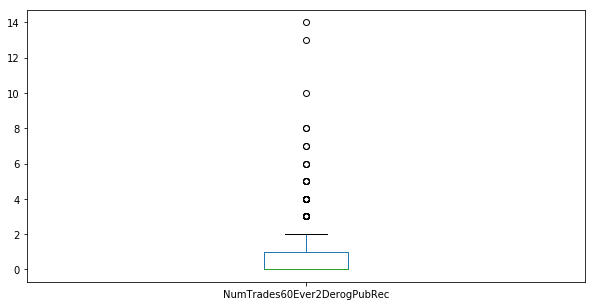

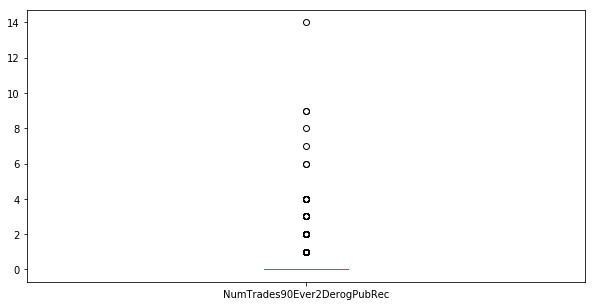

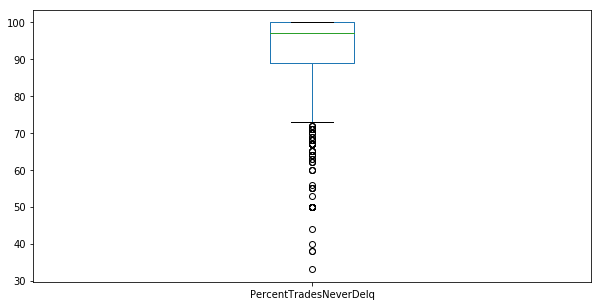

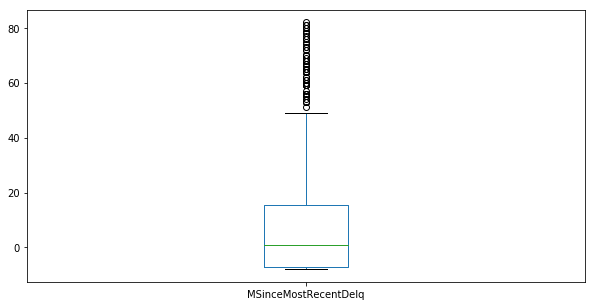

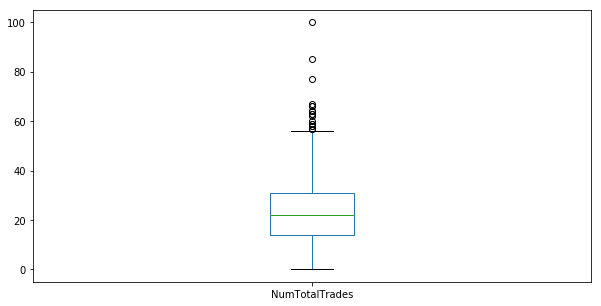

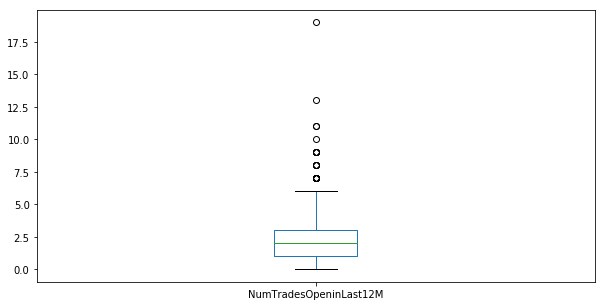

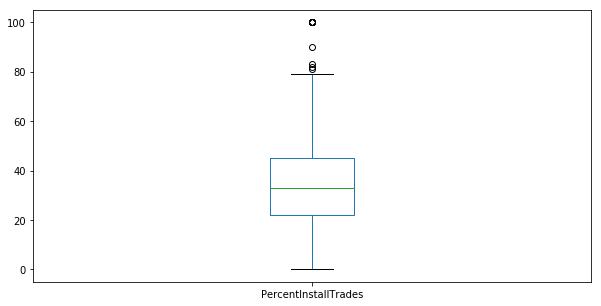

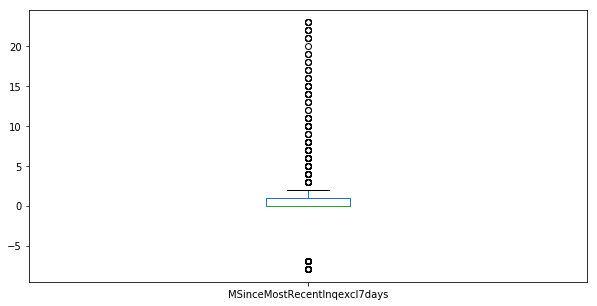

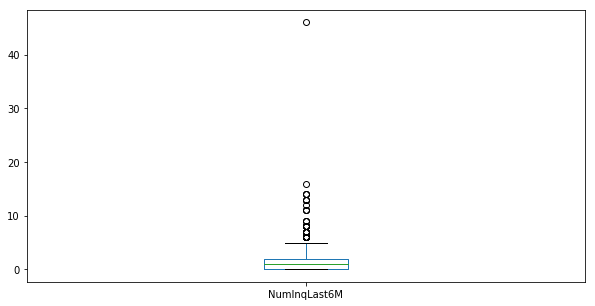

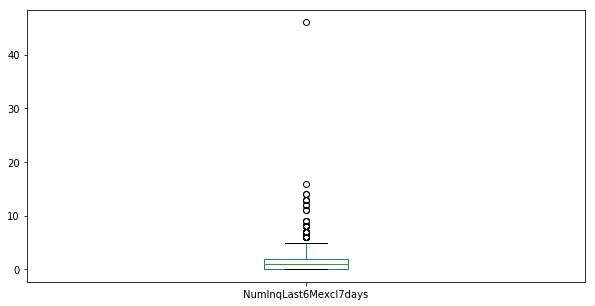

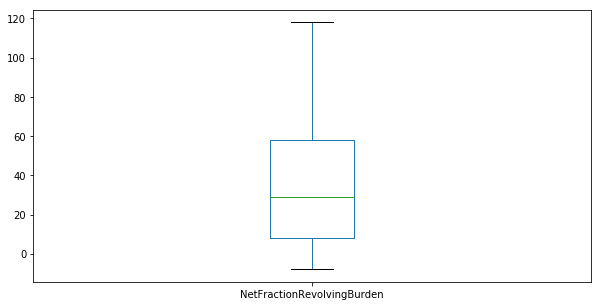

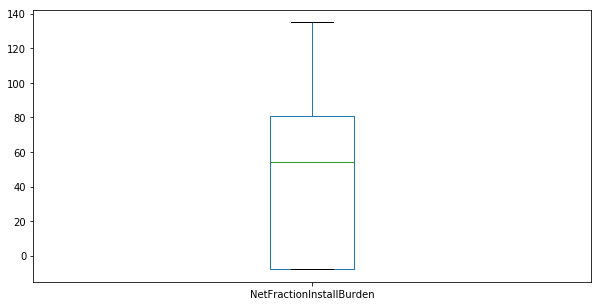

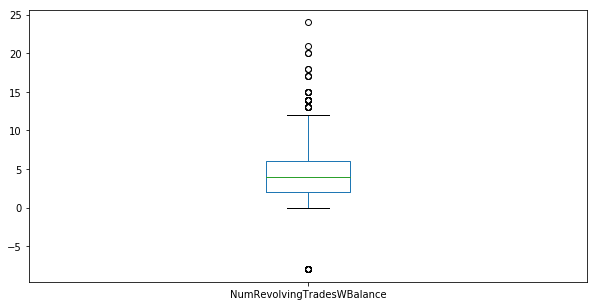

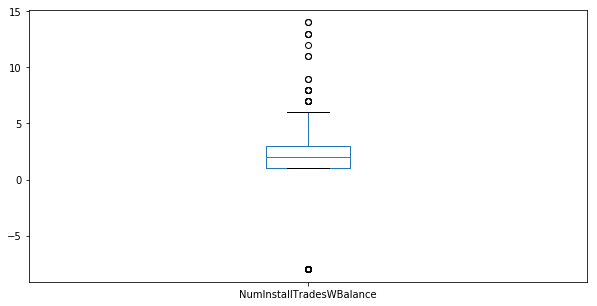

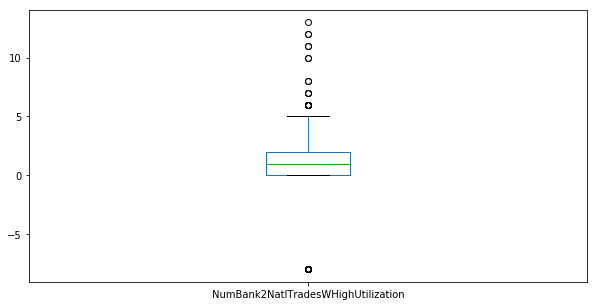

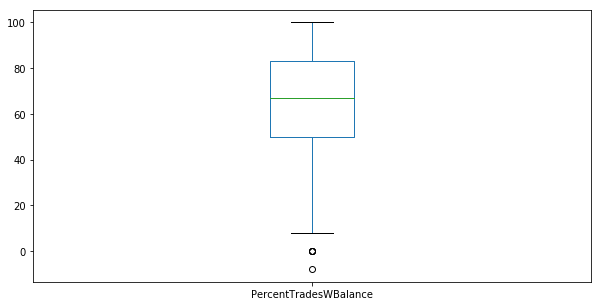

In [42]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots individual sheet for all the categorical features.

Only 3 features - No summary sheet needed

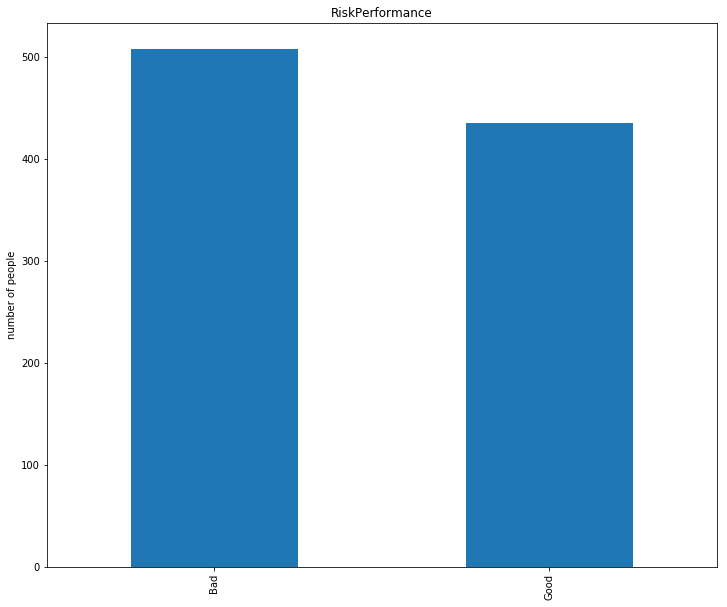

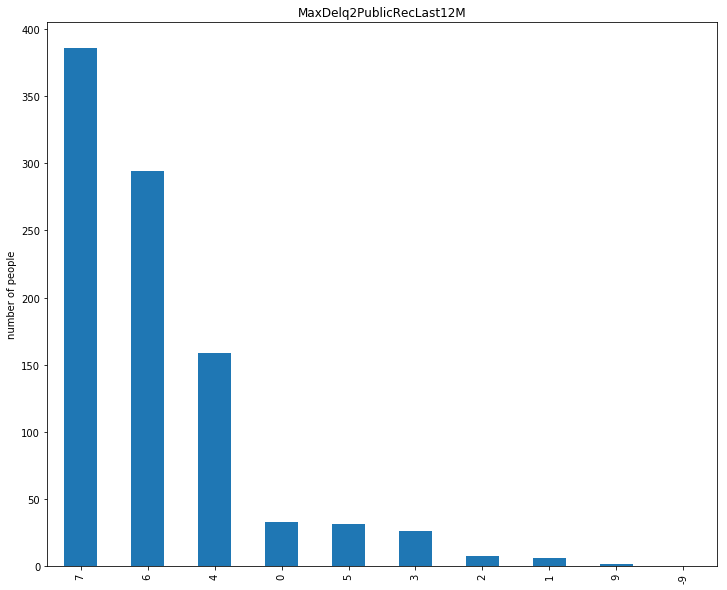

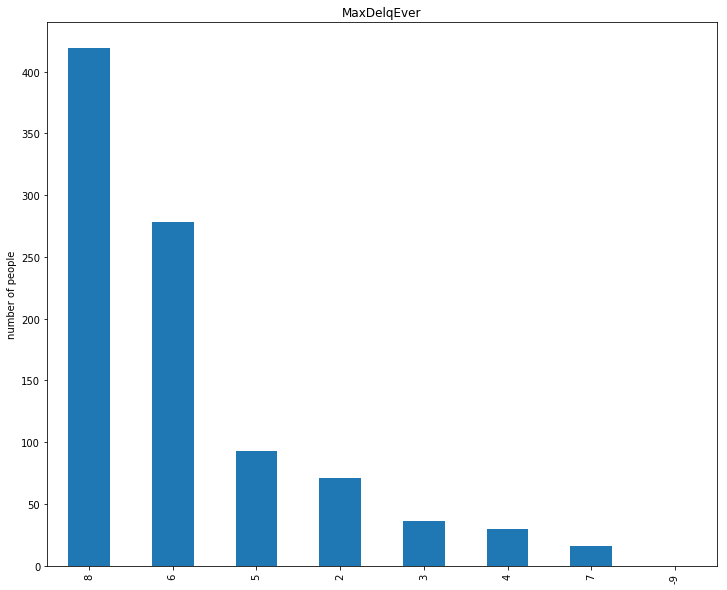

In [43]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

In [44]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\n- Max dequency in last 12 months:", pd.unique(df["MaxDelq2PublicRecLast12M"].ravel()))

Unique values for:
- Max dequency in last 12 months: [0 6 7 4 3 5 1 9 2]


It is not clear why -9 value is in the MaxDelqEver plot. As we can see from the cardinality check there is no -9 value in dataframe. Probably it is kept in the index of the dataframe, even after dropping.

**Running Assessment:**

-  The **cardinalities** of the Categorical features make sense. The low value is explained as being a binary, as previously noted; and there are no very high values which could either be anomolous or present problems for machine learning algorithms. 
<br>

-  There are no **missing values** and no cases of this dataset's remaining special values in the Categorical features.
<br>

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- Special value -9 appeared in 56 rows covering all features. These rows were dropped as part of the initial cleaning as they contained no usable information.
- Special value -8 appears in 9 features. It indicates no usable values found.
- Special value -7 appears in 2 features. *MSinceMostRecentInqexcl7days* & *MSinceMostRecentDelq*. It indicates condition not met.
- Different scales used for similar features - Categorical features *MaxDelqE2PublicREcLast12M* & *MaxDelqEver* are measuring the same event but are using different numerical mappings. One mapping needs to be picked for consistency.
- Presence of outliers - There are a significant number of outliers present across a range of different features. They initially look plausible but will need to be investigated further.

### - Propose solutions to deal with the problems identified. 

1. **Special value -7**
    -  Appears in 2 features. *MSinceMostRecentInqexcl7days* & *MSinceMostRecentDelq*. The -7 value indicates “Condition not Met”. This is a positive marker for the features below representing the best possible case and therefore will need to be set as the largest value in the features that they appear
- **Special value -8** 
    -  Appears in 9 features. Imputation will be performed where possible. Otherwise values will be changed to "null", with a note to revisit those features later.
- **Remap scales used for similar features**
    -  Categorical features *MaxDelqE2PublicREcLast12M* & *MaxDelqEver* are measuring the same event (Delinquency) but are using different numerical mappings. One mapping needs to be picked for consistency.
    -  Re-map “unknown delinquency” value to “current or never delinquent”  
- **Presence of outliers**
    -  There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **Number of entries with Special value -7**
  -  Appears in 2 features. *MSinceMostRecentInqexcl7days* & *MSinceMostRecentDelq*. The -7 value indicates “Condition not Met”. This is a positive marker (monotonically decreasing) for the features below representing the best possible case and therefore will need to be set as the largest value in the features that they appear

In [45]:
print("Special value -7 \t\tcount")
print("MSinceMostRecentDelq\t\t", df[df['MSinceMostRecentDelq']== -7 ].shape[0])
print("MSinceMostRecentInqexcl7days\t", df[df['MSinceMostRecentInqexcl7days']== -7].shape[0])

Special value -7 		count
MSinceMostRecentDelq		 435
MSinceMostRecentInqexcl7days	 169


   - MSinceMostRecentDelq: The largest value for most recent delinquency is 83 months. We will set -7 values to be 1.5 * (largest value) = 125months
   - MSinceMostRecentInqexcl7days: The largest value for most recent delinquency is 24 months. We will set -7 values to be 1.5 * (largest value) = 36months
   - The reason for picking different values for each feature is to keep the values highest values proportionate. Ideally we would speak to the domain expert to get a idea of the most appropriate value to set. 

In [46]:
print("Max value for feature MSinceMostRecentDelq is :", df['MSinceMostRecentDelq'].max())
print("The value that will replace -7 for feature MSinceMostRecentDelq is 1.5 * (largest value):", np.ceil(1.5 * df['MSinceMostRecentDelq'].max()))

df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-7, np.ceil(1.5 * df['MSinceMostRecentDelq'].max()))

Max value for feature MSinceMostRecentDelq is : 82
The value that will replace -7 for feature MSinceMostRecentDelq is 1.5 * (largest value): 123.0


In [47]:
print("Max value for feature MSinceMostRecentDelq is :", df['MSinceMostRecentInqexcl7days'].max())
print("The value that will replace -7 for feature MSinceMostRecentDelq is 1.5 * (largest value):", np.ceil(1.5 * df['MSinceMostRecentInqexcl7days'].max()))

df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-7, np.ceil(1.5 * df['MSinceMostRecentInqexcl7days'].max()))

Max value for feature MSinceMostRecentDelq is : 23
The value that will replace -7 for feature MSinceMostRecentDelq is 1.5 * (largest value): 35.0


2. **Number of entries with Special value -8**
    -  According to the documentation provided by FICO, a value of -8 indicates “No Usable/Valid Trades or Inquiries”.
    -  We want to avoid dropping any features if at all possible 
    -  Below a decision is made for each feature that contains -8 values, weather imputation is feasible or if the values will be changed to null.
    - To aid in the decision the coefficient of variation will be checked. If < 1 imputation with the median will be performed. If > 1 the data will be evaluated to see if imputation with the mean is practical.
    -  For cases where imputation with the mean/median is not possible due to high standard deviation, it would be possible to perform regression analysis to predict what the value would have been based on a group of the nearest neighbours. This however is deemed beyond the scope of this assignment. 

    2.1 MSinceOldestTradeOpen

In [48]:
print("Special value -8 \tcount")
print("MSinceOldestTradeOpen\t", df[df['MSinceOldestTradeOpen']== -8].shape[0])
print()
coeff_var = df['MSinceOldestTradeOpen'].std()/df['MSinceOldestTradeOpen'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
MSinceOldestTradeOpen	 17

Coefficient of variation is:  0.53


   -  MSinceOldestTradeOpen: We can perform imputation on these values as there are very few rows affected and the standard deviation is relatively low. Coefficient of variation is < 1. We will replace with the median value

In [49]:
print("The median value that will be used is: ", df['MSinceOldestTradeOpen'].median())
df['MSinceOldestTradeOpen'] = df['MSinceOldestTradeOpen'].replace(-8, df['MSinceOldestTradeOpen'].median())

The median value that will be used is:  180.0


    2.2 MSinceMostRecentDelq

In [50]:
print("Special value -8 \tcount")
print("MSinceMostRecentDelq\t", df[df['MSinceMostRecentDelq']== -8 ].shape[0])
print()
coeff_var = df['MSinceMostRecentDelq'].std()/df['MSinceMostRecentDelq'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
MSinceMostRecentDelq	 16

Coefficient of variation is:  0.79


MSinceMostRecentDelq: We can perform imputation on these values as the standard deviation is relatively low. Coefficient of variation is < 1. We will replace with the median value

In [51]:
print("The median value that will be used is: ", df['MSinceMostRecentDelq'].median())
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-8, df['MSinceMostRecentDelq'].median())

The median value that will be used is:  64.0


    2.3 MSinceMostRecentInqexcl7days

In [52]:
print("Special value -8 \t\tcount")
print("MSinceMostRecentInqexcl7days\t", df[df['MSinceMostRecentInqexcl7days']== -8].shape[0])
print()
coeff_var = df['MSinceMostRecentInqexcl7days'].std()/df['MSinceMostRecentInqexcl7days'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))
print("Number of entries with value = 0:", df['MSinceMostRecentInqexcl7days'][df['MSinceMostRecentInqexcl7days']<=1].count())

Special value -8 		count
MSinceMostRecentInqexcl7days	 43

Coefficient of variation is:  1.74
Number of entries with value = 0: 554


MSinceMostRecentInqexcl7days: The standard deviation is high, with a coefficient of variation of 1.78. This is because 171 entries had a value of -7. See section dealing with special value -7 above. These were replaced by a value of 36 months. Ideally a regression analysis would be performed here to determine the most appropriate value but is outside the scope of the assignment. In light of this and considering the relatively small number of rows affected, replacing with the median value is the most appropriate since over 55%  of all entries are the median value

In [53]:
print("The median value that will be used is: ", df['MSinceMostRecentInqexcl7days'].median())
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-8, df['MSinceMostRecentInqexcl7days'].median())

The median value that will be used is:  0.0


    2.4 NetFractionRevolvingBurden

In [54]:
print("Special value -8 \t\tcount")
print("NetFractionRevolvingBurden\t", df[df['NetFractionRevolvingBurden']== -8].shape[0])
print()
coeff_var = df['NetFractionRevolvingBurden'].std()/df['NetFractionRevolvingBurden'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 		count
NetFractionRevolvingBurden	 16

Coefficient of variation is:  0.85


NetFractionRevolvingBurden: We can perform imputation on these values as the standard deviation is relatively low. Coefficient of variation is < 1. We will replace with the median value

In [55]:
print("The median value that will be used is: ", df['NetFractionRevolvingBurden'].median())
df['NetFractionRevolvingBurden'] = df['NetFractionRevolvingBurden'].replace(-8, df['NetFractionRevolvingBurden'].median())

The median value that will be used is:  29.0


    2.5 NetFractionInstallBurden

In [56]:
print("Special value -8 \tcount")
print("NetFractionInstallBurden", df[df['NetFractionInstallBurden']== -8].shape[0])
print()
coeff_var = df['NetFractionInstallBurden'].std()/df['NetFractionInstallBurden'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

print("\nMedian value is: ", df['NetFractionInstallBurden'].median(), "\n")
print("Mean value is: ", df['NetFractionInstallBurden'].mean(), "\n")




Special value -8 	count
NetFractionInstallBurden 308

Coefficient of variation is:  0.94

Median value is:  54.0 

Mean value is:  43.361611876988334 



NetFractionInstallBurden: The coefficient of variation (COV) is just under 1. However looking at the plot the spread of the data too wide. Seeing as there is over 300 entries to change it does not seem practical to change all 300 rows to the median. This will skew the results too much. It seems more appropriate to change the values to null, in this case. This is not ideal as it still leaves Nan in the dataset, so we may come back to this decision later, to decide whether to drop this feature or still do imputation.

In [57]:
df['NetFractionInstallBurden'] = df['NetFractionInstallBurden'].replace(-8, np.nan)
print("Values changed to null: ", df['NetFractionInstallBurden'].isnull().sum())

Values changed to null:  308


    2.6 NumRevolvingTradesWBalance

In [58]:
print("Special value -8 \tcount")
print("NumRevolvingTradesWBalance", df[df['NumRevolvingTradesWBalance']== -8].shape[0])
print()
coeff_var = df['NumRevolvingTradesWBalance'].std()/df['NumRevolvingTradesWBalance'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
NumRevolvingTradesWBalance 13

Coefficient of variation is:  0.85


NumRevolvingTradesWBalance: The standard deviation is quite low. Imputation with the median will be performed here.

In [59]:
print("The median value that will be used is: ", df['NumRevolvingTradesWBalance'].median())
df['NumRevolvingTradesWBalance'] = df['NumRevolvingTradesWBalance'].replace(-8, df['NumRevolvingTradesWBalance'].median())

The median value that will be used is:  4.0


    2.7 NumInstallTradesWBalance

In [60]:
print("Special value -8 \tcount")
print("NumInstallTradesWBalance", df[df['NumInstallTradesWBalance']== -8].shape[0])
print()
coeff_var = df['NumInstallTradesWBalance'].std()/df['NumInstallTradesWBalance'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
NumInstallTradesWBalance 78

Coefficient of variation is:  2.02


NumInstallTradesWBalance: The coefficient of variation (COV) is relatively high at 2.02. However the mean is low and this appears to be skewing the COV to a high value. Looking at the histogram it seems appropriate to change -8 values to the median. Imputation with the median will be performed here.

In [61]:
print("The median value that will be used is: ", df['NumInstallTradesWBalance'].median())
df['NumInstallTradesWBalance'] = df['NumInstallTradesWBalance'].replace(-8, df['NumInstallTradesWBalance'].median())

The median value that will be used is:  2.0


    2.8 NumBank2NatlTradesWHighUtilization

In [62]:
print("Special value -8 \tcount")
print("NumBank2NatlTradesWHighUtilization", df[df['NumBank2NatlTradesWHighUtilization']== -8].shape[0])
print()
coeff_var = df['NumBank2NatlTradesWHighUtilization'].std()/df['NumBank2NatlTradesWHighUtilization'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
NumBank2NatlTradesWHighUtilization 51

Coefficient of variation is:  3.82


NumBank2NatlTradesWHighUtilization: The coefficient of variation (COV) is very high at 4.57. However the mean is very low and this appears to be skewing the COV to a high value. Looking at the histogram it seems appropriate to change -8 values to the median. Imputation with the median will be performed here.

In [63]:
print("The median value that will be used is: ", df['NumBank2NatlTradesWHighUtilization'].median())
df['NumBank2NatlTradesWHighUtilization'] = df['NumBank2NatlTradesWHighUtilization'].replace(-8, df['NumBank2NatlTradesWHighUtilization'].median())

The median value that will be used is:  1.0


    2.9 PercentTradesWBalance

In [64]:
print("Special value -8 \tcount")
print("PercentTradesWBalance\t", df[df['PercentTradesWBalance']== -8].shape[0])
print()
coeff_var = df['PercentTradesWBalance'].std()/df['PercentTradesWBalance'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Special value -8 	count
PercentTradesWBalance	 1

Coefficient of variation is:  0.33


PercentTradesWBalance: The coefficient of variation is low and there is only one -8 value. Imputation with the median will be performed here.

In [65]:
print("The median value that will be used is: ", df['PercentTradesWBalance'].median())
df['PercentTradesWBalance'] = df['PercentTradesWBalance'].replace(-8, df['PercentTradesWBalance'].median())

The median value that will be used is:  67.0


3. Drop rows failing logical test from part 1
 -  Tests 1,3,5,6,7,8,9,10 had failures and will now be handled

In [66]:
print("Total number of rows dropped: ", test_1.shape[0])
df = df.drop(test_1.index)

Total number of rows dropped:  67


We will now retest the remaining failures again as it is likely that many of the inconsistencies have been taken care of by removing the 74 rows above. Cells with errors are likely to be grouped together.

In [67]:
test_3 = df[['NumTradesOpeninLast12M','NumTotalTrades']][df['NumTradesOpeninLast12M']>df['NumTotalTrades']].index
print("Total number of rows still to be dropped: ", test_3.shape[0])

Total number of rows still to be dropped:  0


In [68]:
test_5 = df[['NumTrades90Ever2DerogPubRec','NumTotalTrades']][df['NumTrades90Ever2DerogPubRec']>df['NumTotalTrades']].index
print("Total number of rows still to be dropped: ", test_5.shape[0])

Total number of rows still to be dropped:  1


In [69]:
test_6 = df[['MSinceMostRecentTradeOpen','MSinceOldestTradeOpen']][df['MSinceMostRecentTradeOpen']>df['MSinceOldestTradeOpen']].index
print("Total number of rows still to be dropped: ", test_6.shape[0])

Total number of rows still to be dropped:  0


In [70]:
test_7 = df[['NumRevolvingTradesWBalance','NumTotalTrades']][df['NumRevolvingTradesWBalance']>df['NumTotalTrades']].index
print("Total number of rows still to be dropped: ", test_7.shape[0])
df = df.drop(test_7)

Total number of rows still to be dropped:  6


In [71]:
test_8 = df[['NumInstallTradesWBalance','NumTotalTrades']][df['NumInstallTradesWBalance']>df['NumTotalTrades']].index
print("Total number of rows still to be dropped: ", test_8.shape[0])
df = df.drop(test_8)

Total number of rows still to be dropped:  0


In [72]:
test_9 = df[['NumBank2NatlTradesWHighUtilization','NumTotalTrades']][df['NumBank2NatlTradesWHighUtilization']>df['NumTotalTrades']].index
print("Total number of rows still to be dropped: ", test_9.shape[0])

Total number of rows still to be dropped:  0


In [73]:
test_10 = df[['NumTotalTrades','MSinceMostRecentTradeOpen']][df['NumTotalTrades']==0][df["MSinceMostRecentTradeOpen"]>=0].index
print("Total number of rows still to be dropped: ", test_10.shape[0])

Total number of rows still to be dropped:  0


In [74]:
test_11 = df[['PercentTradesNeverDelq','NumTrades60Ever2DerogPubRec']][df['PercentTradesNeverDelq']==100][df["NumTrades60Ever2DerogPubRec"]>0].index
print("Total number of rows still to be dropped: ", test_11.shape[0])
df = df.drop(test_11)

Total number of rows still to be dropped:  32


In [75]:
test_13 = df[['MSinceMostRecentDelq','NumTrades60Ever2DerogPubRec']][df['MSinceMostRecentDelq']==0][df["NumTrades60Ever2DerogPubRec"]==0].index
print("Number of rows failing the test: ", test_13.shape[0])
df = df.drop(test_13)

Number of rows failing the test:  5


All inconsistencies have now been dropped. Note that many of the retests passed. This indicated that inconsistent data was grouped together.

4. Remap scales used for similar features
    - Map *MaxDelqE2PublicREcLast12M* scale to match *MaxDelqEver* scale
        -  Both features are measuring the same event (Delinquency) but are using different numerical mappings. One mapping is chose to be picked for consistency.
        -  We will choose to use MaxDelqEver mapping as default as each number only appears once, simplifying the conversion
    - Combine “unknown delinquency” & “current or never delinquent”
        -  It is suspected that “unknown delinquency” is the equivalent of a “null value”. This should be checked with the domain expert. It is highly unlikely that a delinquency event would be omitted from the record. Therefore, in absence of any further information, I would recommend a “null value” is treated the same as “current or never delinquent” and should be mapped as such.

Original Scale


| MaxDelq2PublicRecLast12M | MaxDelqEver | meaning                      |
|--------------------------|-------------|------------------------------|
| 0                        | 2           | derogatory comment           |
| 1                        | 3           | 120+ days delinquent         |
| 2                        | 4           | 90 days delinquent           |
| 3                        | 5           | 60 days delinquent           |
| 4                        | 6           | 30 days delinquent           |
| 5,6                      | 7           | unknown delinquency          |
| 7                        | 8           | current and never delinquent |
| 8,9                      | 9           | all other                    |

Step 1 :Map *MaxDelqE2PublicREcLast12M* scale to match *MaxDelqEver* scale


| MaxDelq2PublicRecLast12M | MaxDelqEver | meaning                      |
|--------------------------|-------------|------------------------------|
| 2                        | 2           | derogatory comment           |
| 3                        | 3           | 120+ days delinquent         |
| 4                        | 4           | 90 days delinquent           |
| 5                        | 5           | 60 days delinquent           |
| 6                        | 6           | 30 days delinquent           |
| 7                        | 7           | unknown delinquency          |
| 8                        | 8           | current and never delinquent |

Step 2: Combine “unknown delinquency” & “current or never delinquent”


| MaxDelq2PublicRecLast12M | MaxDelqEver | meaning                      |
|--------------------------|-------------|------------------------------|
| 2                        | 2           | derogatory comment           |
| 3                        | 3           | 120+ days delinquent         |
| 4                        | 4           | 90 days delinquent           |
| 5                        | 5           | 60 days delinquent           |
| 6                        | 6           | 30 days delinquent           |
| 7                        | 7           | current and never delinquent |

In [76]:
# Step 1
# replacing all values to remporary value (12 = temp value 2, 13 = temp value 3 and so on....)
df1 = df['MaxDelq2PublicRecLast12M']
df1 = df1.replace(0, 12)
df1 = df1.replace(1, 13)
df1 = df1.replace(2, 14)
df1 = df1.replace(3, 15)
df1 = df1.replace(4, 16)
df1 = df1.replace(5, 17)
df1 = df1.replace(6, 17)
df1 = df1.replace(7, 18)
df1 = df1.replace(8, 19)
df1 = df1.replace(9, 19)

df1 = df1.replace(12, 2)
df1 = df1.replace(13, 3)
df1 = df1.replace(14, 4)
df1 = df1.replace(15, 5)
df1 = df1.replace(16, 6)
df1 = df1.replace(17, 7)
df1 = df1.replace(18, 8)
df1 = df1.replace(19, 9)

# step 2
# shift values down for both features
df1 = df1.replace(8, 7)
df['MaxDelq2PublicRecLast12M'] = df1
df['MaxDelq2PublicRecLast12M'] = df['MaxDelq2PublicRecLast12M'].astype('category')

df1 = df['MaxDelqEver']
df1 = df1.replace(8, 7)
df['MaxDelqEver'] = df1
df['MaxDelqEver'] = df['MaxDelqEver'].astype('category')

Index value & Count
7    628
6    144
5     25
2     24
4      6
3      6
Name: MaxDelq2PublicRecLast12M, dtype: int64


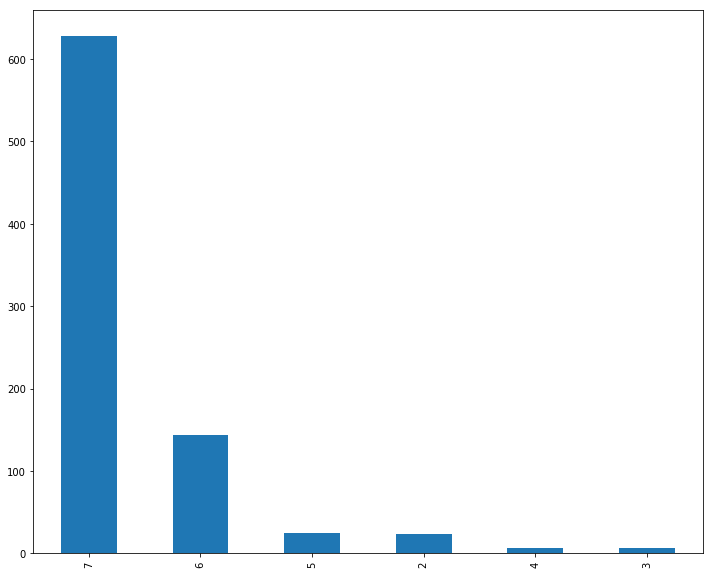

In [77]:
df["MaxDelq2PublicRecLast12M"].value_counts().plot(kind='bar', figsize=(12,10))
print("Index value & Count")
print(df["MaxDelq2PublicRecLast12M"].value_counts())

Index value & Count


 7    367
 6    247
 5     88
 2     66
 3     36
 4     29
 8      0
-9      0
Name: MaxDelqEver, dtype: int64

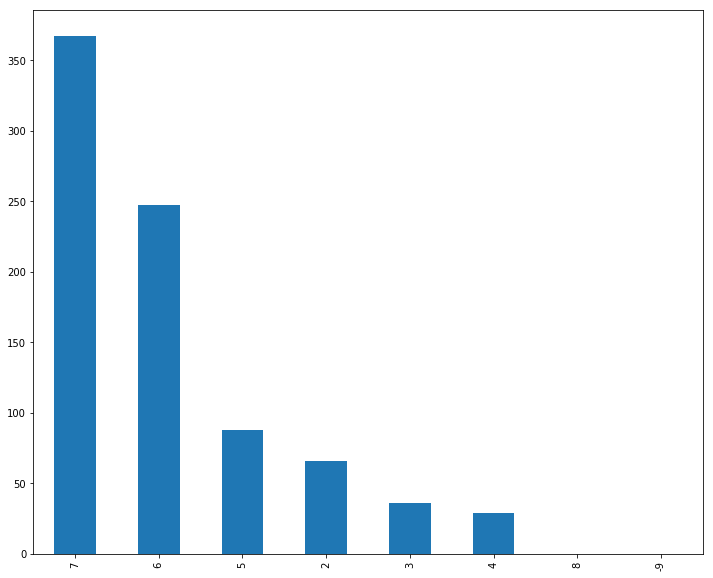

In [78]:
df["MaxDelqEver"].value_counts().plot(kind='bar', figsize=(12,10))
print("Index value & Count")
df["MaxDelqEver"].value_counts()

Note that for MaxDelqEver values 8, -9 remain in the scale. The reason for this is unclear as the count is 0 for both. This will not effect analysis

### 5. Presence of outliers

 - Months since oldest trade open: Max is 598 months = 50 years. This is plausible 
 - Months since most recent trade open: Max is 97 months = 8 years. This is plausible
 - Average months on file: Max is 240 months = 20 years. This is plausible
 - Number satisfactory trades: Max 78. This is plausible. Number of satisfactory trades increases in line with number of total trades

In [79]:
df.sort_values(by='NumSatisfactoryTrades', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['NumSatisfactoryTrades', 'NumTotalTrades']].head(5)

,NumSatisfactoryTrades,NumTotalTrades
915,78,100
552,67,67
587,63,64
755,63,64
406,62,63


 - Number of Derogatory trades 60, 90 late - Values seem plausible/logical and increase in line with each other

In [80]:
df.sort_values(by='NumTrades60Ever2DerogPubRec', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['NumTrades90Ever2DerogPubRec', 'NumTrades60Ever2DerogPubRec', 'NumTotalTrades']].head(5)

,NumTrades90Ever2DerogPubRec,NumTrades60Ever2DerogPubRec,NumTotalTrades
153,14,14,44
791,9,13,9
772,9,10,52
179,6,8,18
687,4,7,16


 - Percentage trades never delinquent - low percentage values are a concern (see test 12). Need to speak to domain expert 

In [81]:
df.sort_values(by='PercentTradesNeverDelq', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[['PercentTradesNeverDelq', 'NumTrades60Ever2DerogPubRec', 'NumTotalTrades']].head(5)

,PercentTradesNeverDelq,NumTrades60Ever2DerogPubRec,NumTotalTrades
211,33,2,11
91,38,4,41
834,38,4,13
373,40,2,5
791,44,13,9


 -  Months since most recent delinquency - genuine max is 83 months. This seems plausible.

Overall are too many outliers to consider here. I could not deduce weather the outlier are wrong or not. Thus to be on the safe side I decided to keep them. The machine learning algorithms still need to deal with outliers in the real world as training data that is *too perfect and ideal* is just another form of bias.

### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| ExternalRiskEstimate               | Outliers                      | Do Nothing                     |
| MSinceOldestTradeOpen              | Negative Value -8 (29 rows)   | Replace with median            |
| MSinceMostRecentTradeOpen          | Outliers                      | Do Nothing                     |
| AverageMInFile                     | Outliers                      | Do Nothing                     |
| NumSatisfactoryTrades              | Outliers                      | Do Nothing                     |
| NumTrades60Ever2DerogPubRec        | Outliers                      | Do Nothing                     |
| NumTrades90Ever2DerogPubRec        | Outliers                      | Do Nothing                     |
| PercentTradesNeverDelq             | Outliers                      | Do Nothing                     |
| MSinceMostRecentDelq               | Negative Value -8 (13 rows)   | Replace with median            |
| MSinceMostRecentDelq               | Negative Value -7 ( 438 rows) | Replace with 125               |
| MSinceMostRecentDelq               | Outliers                      | Do Nothing                     |
| MaxDelq2PublicRecLast12M           | Scale                         | Replace with MaxDelqEver scale |
| MaxDelq2PublicRecLast12M           | Scale                         | Combine index 7 & 8            |
| MaxDelqEver                        | Scale                         | Combine index 7 & 8            |
| NumTotalTrades                     | Outliers                      | Do Nothing                     |
| NumTradesOpeninLast12M             | Outliers                      | Do Nothing                     |
| PercentInstallTrades               | Outliers                      | Do Nothing                     |
| MSinceMostRecentInqexcl7days       | Negative Value -8 (46 rows)   | Replace with median            |
| MSinceMostRecentInqexcl7days       | Negative Value -7 (171 rows)  | Replace with 36                |
| MSinceMostRecentInqexcl7days       | Outliers                      | Do Nothing                     |
| NumInqLast6M                       | Outliers                      | Do Nothing                     |
| NumInqLast6Mexcl7days              | Outliers                      | Do Nothing                     |
| NetFractionRevolvingBurden         | Negative Value -8 (12 rows)   | Replace with median            |
| NetFractionRevolvingBurden         | Outliers                      | Do Nothing                     |
| NetFractionInstallBurden           | Negative Value -8 (319 rows)  | Replace with Null (*may need to revisit this later)              |
| NetFractionInstallBurden           | Outliers                      | Do Nothing                     |
| NumRevolvingTradesWBalance         | Negative Value -8 (10 rows)   | Replace with median            |
| NumRevolvingTradesWBalance         | Outliers                      | Do Nothing                     |
| NumInstallTradesWBalance           | Negative Value -8 (79 rows)   | Replace with median            |
| NumInstallTradesWBalance           | Outliers                      | Do Nothing                     |
| NumBank2NatlTradesWHighUtilization | Negative Value -8 (54 rows)   | Replace with median            |
| NumBank2NatlTradesWHighUtilization | Outliers                      | Do Nothing                     |
| PercentTradesWBalance              | Negative Value -8 (1 rows)    | Replace with median            |
| PercentTradesWBalance              | Outliers                      | Do Nothing                     |

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [82]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,833.0,71.536615,10.300365,-9.0,64.0,71.0,80.0,93.0
MSinceOldestTradeOpen,833.0,199.681873,98.889973,8.0,133.0,184.0,256.0,789.0
MSinceMostRecentTradeOpen,833.0,9.008403,10.467380,0.0,3.0,6.0,11.0,84.0
AverageMInFile,833.0,76.244898,32.429325,4.0,54.0,74.0,95.0,217.0
NumSatisfactoryTrades,833.0,21.725090,12.011115,1.0,13.0,20.0,29.0,78.0
NumTrades60Ever2DerogPubRec,833.0,0.591837,1.292185,0.0,0.0,0.0,1.0,14.0
NumTrades90Ever2DerogPubRec,833.0,0.368547,1.022497,0.0,0.0,0.0,0.0,14.0
PercentTradesNeverDelq,833.0,91.895558,11.682803,33.0,89.0,96.0,100.0,100.0
MSinceMostRecentDelq,833.0,67.066026,52.308664,0.0,12.0,62.0,123.0,123.0
NumTotalTrades,833.0,24.481393,13.125502,3.0,15.0,23.0,32.0,100.0


In [83]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,833,2,Bad,446
MaxDelq2PublicRecLast12M,833,6,7,628
MaxDelqEver,833,6,7,367


In [84]:
# Write the cleaned dataframe to a csv file
df.to_csv('CreditRisk_1-2_cleaned.csv', index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- External Risk Estimate: 
- Percent of trades never delinquent: 
- Number of trades 60 days late:
- Months since most recent delinquency
- Number of trades open in the last 12 months
- Percent install trades
- Number of enquiries in last 6 months excluding 7 days
- Number Revolving trades with balance
- Number install trades with balance

and the following categorical features:
- Risk performance
- Max delinquency in last 12 month
- Max delinquency ever

The choices here I based on the idea that these particular features would be strong markers to indicate the credit risk of an applicant, as also discussed based on plots in the Data_Quality_report.pdf.

### Correlations for the numeric features

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

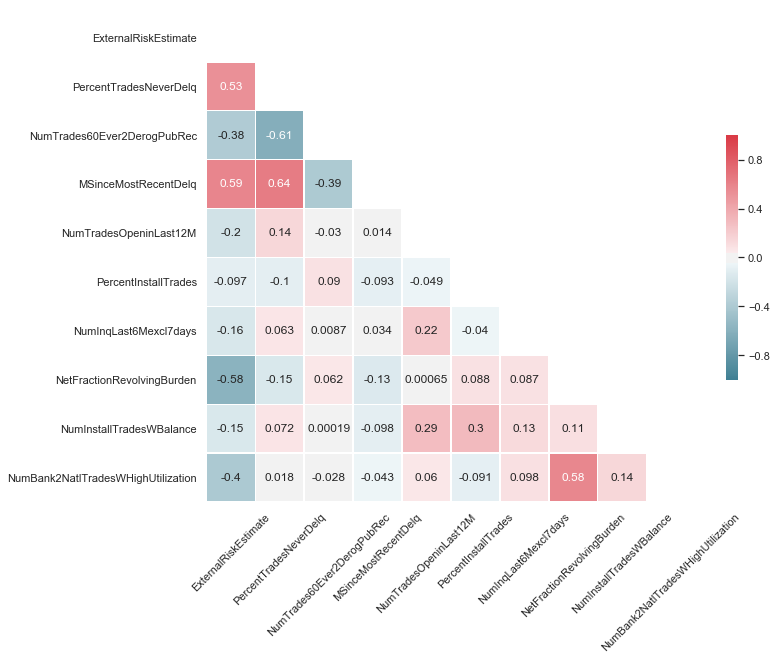

In [85]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
continuous_columns1 = ['ExternalRiskEstimate',
                      'PercentTradesNeverDelq',
                      'NumTrades60Ever2DerogPubRec',
                      'MSinceMostRecentDelq',
                      'NumTradesOpeninLast12M' ,
                      'PercentInstallTrades',
                      'NumInqLast6Mexcl7days',
                      'NetFractionRevolvingBurden',
                      'NumInstallTradesWBalance',
                      'NumBank2NatlTradesWHighUtilization']
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

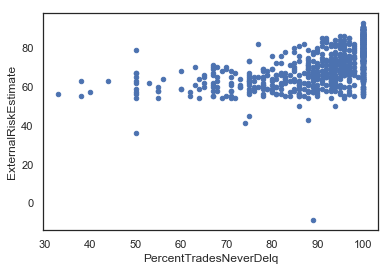

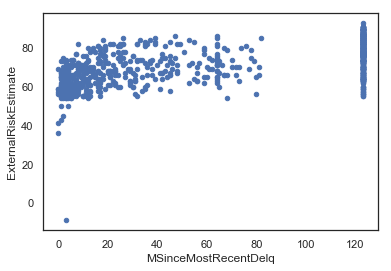

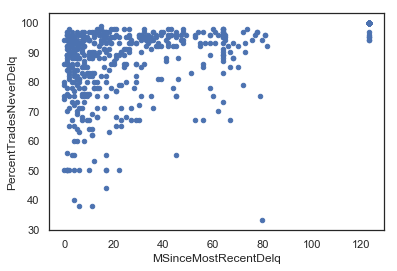

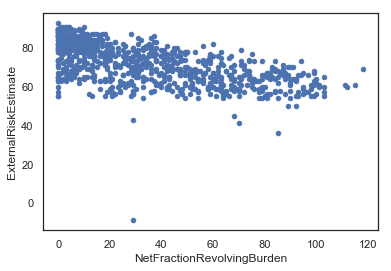

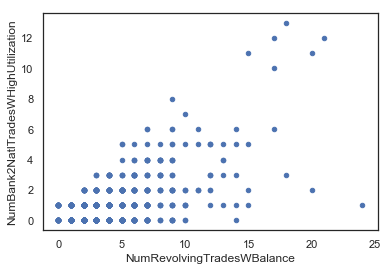

In [86]:
df.plot(kind='scatter', x='PercentTradesNeverDelq', y='ExternalRiskEstimate')
df.plot(kind='scatter', x='MSinceMostRecentDelq', y='ExternalRiskEstimate')
df.plot(kind='scatter', x='MSinceMostRecentDelq', y='PercentTradesNeverDelq')
df.plot(kind='scatter', x='NetFractionRevolvingBurden', y='ExternalRiskEstimate')
df.plot(kind='scatter', x='NumRevolvingTradesWBalance', y='NumBank2NatlTradesWHighUtilization')

The continuous features above were chosen as we believed they could have a strong impact on risk outcome.
- We can see from the above correlation matrix that there are a couple of correlations worth discussing (We have omitted some features that would have very high correlation but provide no additional information e.g. enquiries in last 6 months vs enquiries  in last 6 months excl last 7 days).
- We can see the impact that the -8 special value is having for percentage trades never delinquent (transformed into 125) but even excluding it their is no strong correlation.
- We see a correlation (0.53) between the external risk estimate and the percentage of trades never delinquent.
- We see a correlation (-0.63) between the external risk estimate and the net fraction of trades with burden 
- From this we do not get much additional information only that the external risk estimate looks like a good marker

### Categorical vs Categorical feature plots

MaxDelqEver
Index 	 Count
6 	 247
7 	 367
3 	 36
4 	 29
5 	 88
2 	 66


(0, 100)

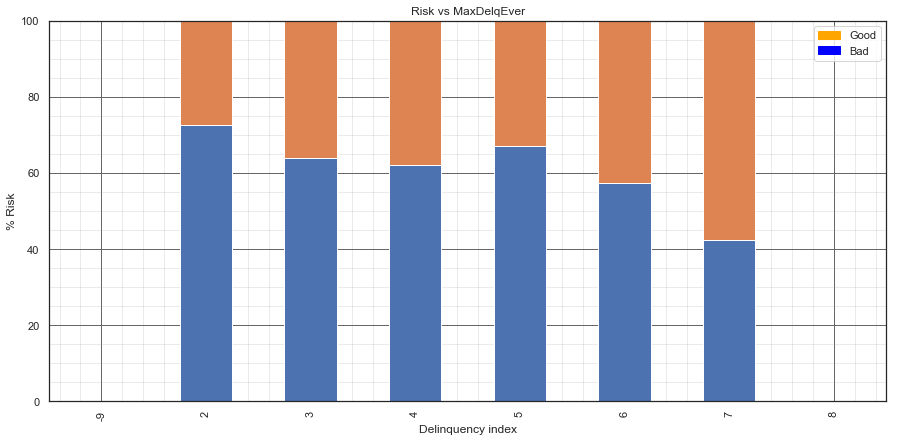

In [87]:
#Using code from the module lab
maxDelqEver = pd.unique(df["MaxDelqEver"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("MaxDelqEver")
print("Index \t Count")

# for each delinquency category
for i in maxDelqEver:
    
    count = df[df["MaxDelqEver"] == i].count()['RiskPerformance']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','MaxDelqEver','RiskPerformance']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk vs MaxDelqEver", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Delinquency index")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Delinquency against the target risk outcome. 
- On first indication the figures are not as expected.
- There is no clear trend of decreasing likelihood of "bad" outcomes as delinquency scale improves.
- Only when we reach index 7, which means no delinquency do we see a significant drop.
- This indicates that a financial institution will look at any type of delinquency, either derogatory, 30, 60 or 90 days late in the same light.
- Judging from this we could derive a new feature of with a binary value, delinquent or not, without losing much information.
- In summary 
    -  If entry has ever had a delinquency there is approx 60% likelihood of a bad risk marker
    -  If entry has never had delinquency there is approx 40% likelihood of a bad risk marker


MaxDelq2PublicRecLast12M
Index 	 Count
7 	 628
6 	 144
5 	 25
2 	 24
3 	 6
4 	 6


(0, 100)

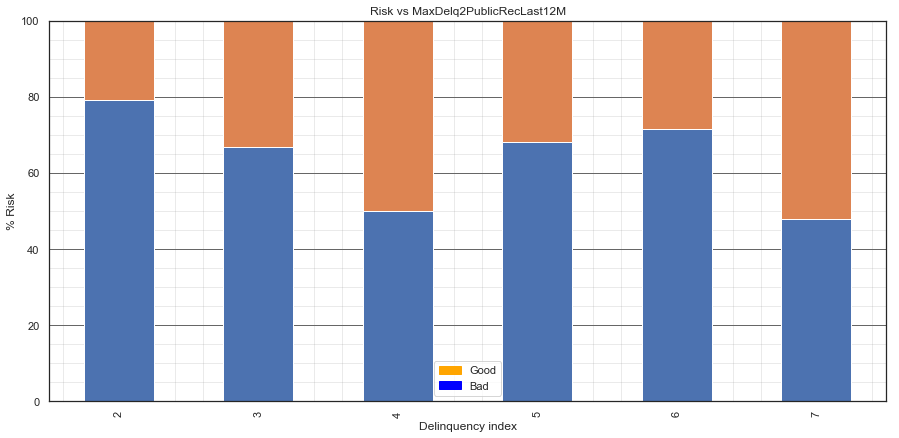

In [88]:
#Using code from the module lab
maxDelqEver = pd.unique(df["MaxDelq2PublicRecLast12M"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("MaxDelq2PublicRecLast12M")
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df["MaxDelq2PublicRecLast12M"] == i].count()['RiskPerformance']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','MaxDelq2PublicRecLast12M','RiskPerformance']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk vs MaxDelq2PublicRecLast12M", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Delinquency index")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Delinquency in the last 12 months against the target risk outcome. 

- Similar to the "max delinquency ever" scale above, on first indication the figures are not as expected.
- There is no clear trend of decreasing number of "bad" outcomes as delinquency  scale improves.
- For some of the index vales there are very few entries. For example index 4 has count of 4, index 3 has a count of 2. Index 6 and 7 dominate in terms of count.
- Again this reinforces the view that a financial institution will look at any type of delinquency, either derogatory, 30, 60 or 90 days late in the same light.
- Similarly we could derive a new feature with a binary value, delinquent or not in last 12 months, without losing much information.
- In summary 
    - If entry has had a delinquency in last 12 months there is approx 75% likelihood of a bad risk marker
        - This indicates a more recent delinquency has a stronger impact. (75% vs 60%) This is as expected.
    - If entry has not had delinquency in last 12 months there is approx 50% likelihood of a bad risk marker
        - This indicates the narrower time scale for this measurement (12 months vs ever) has a bearing on higher risk (50% vs 40%). This is as expected.
    


### Continuous-categorical feature plots

1. Plot Months since most recent dleinquency vs Risk marker

<Figure size 432x288 with 0 Axes>

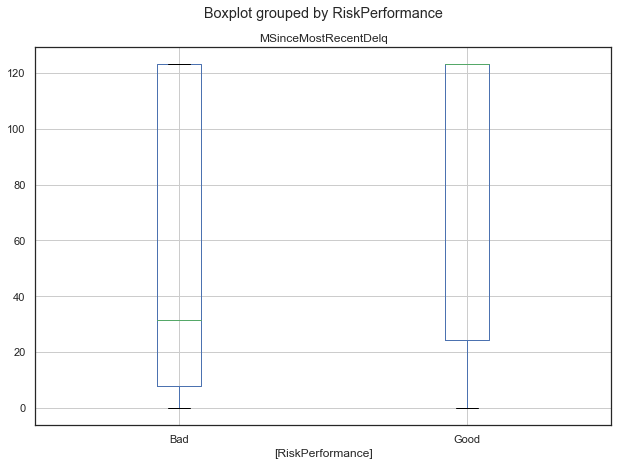

In [89]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['MSinceMostRecentDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

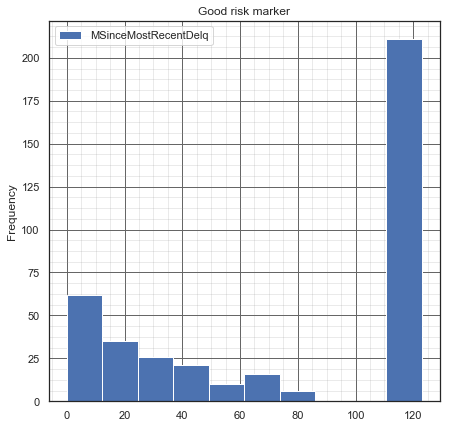

In [90]:
df[df['RiskPerformance'] == "Good"][['MSinceMostRecentDelq']].plot(kind='hist',figsize=(7,7), bins=10, title="Good risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

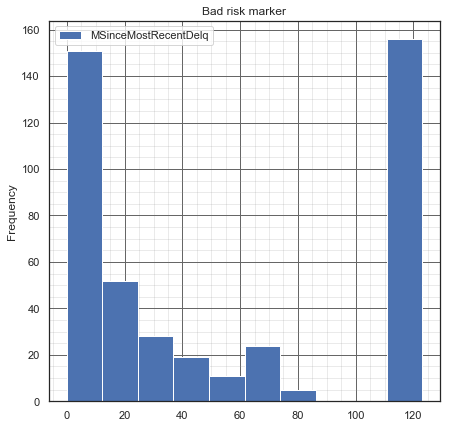

In [91]:
df[df['RiskPerformance'] == "Bad"][['MSinceMostRecentDelq']].plot(kind='hist',figsize=(7,7), bins=10, title="Bad risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  - We can see from the above histograms that there is significantly more people with a delinqency who have a bad outcome as expected
  - We can see from the above box plots that the median value for a bad outcome is approximately 30 months while the median value for a good outcome is 125 months (-8 special value was changed to 125 months). This is expected 
  - We can conclude that delinquency is a good risk marker.

2. Plot Percentage of Trades With Balance vs Risk marker

<Figure size 432x288 with 0 Axes>

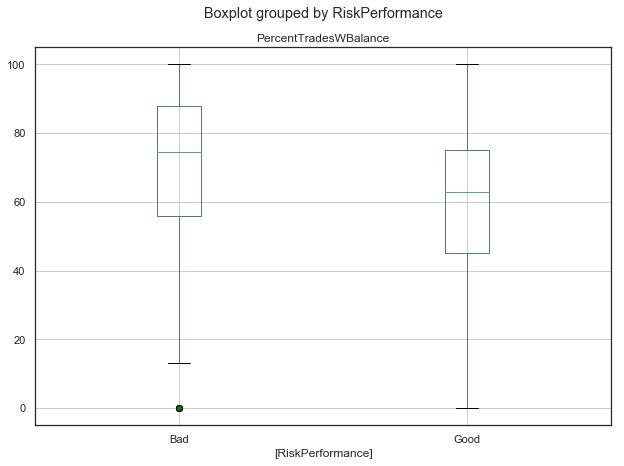

In [92]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['PercentTradesWBalance'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

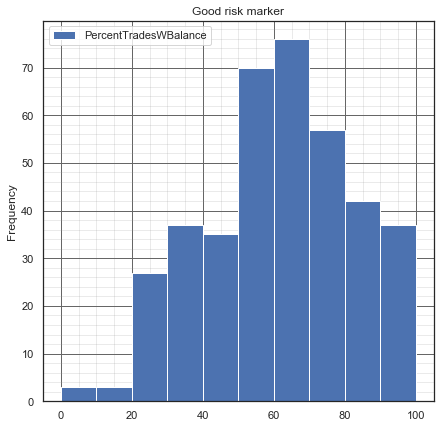

In [93]:
df[df['RiskPerformance'] == "Good"][['PercentTradesWBalance']].plot(kind='hist',figsize=(7,7), bins=10, title="Good risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

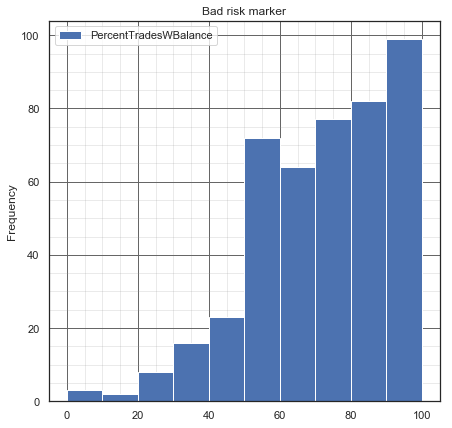

In [94]:
df[df['RiskPerformance'] == "Bad"][['PercentTradesWBalance']].plot(kind='hist',figsize=(7,7), bins=10, title="Bad risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

   - We can see here that a higher % trades with a balance results in a higher likliehood of bad risk outcome
   - From the histograms above we see that there is a much lower likliehood of a good risk outcome if % trade with a balance is in the 80-100% range
   - The interquartile range of the bad outcom (median=75%) is higher than the good outcome (median=60%)  reinforcing the observations from the histograms
   - We can conclude that % utilisation is a good risk marker.

3. Plot External Risk Estimate vs Risk marker

<Figure size 432x288 with 0 Axes>

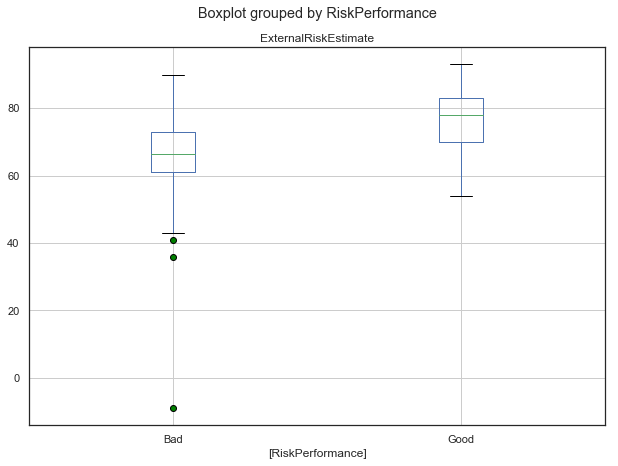

In [95]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

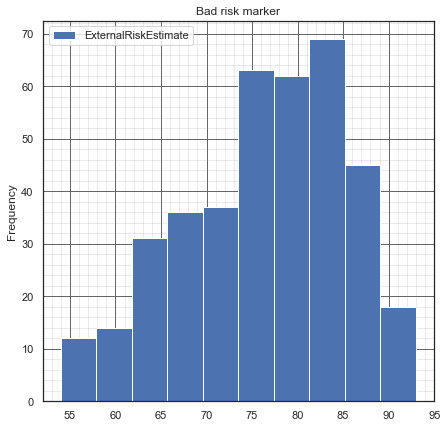

In [96]:
df[df['RiskPerformance'] == "Good"][['ExternalRiskEstimate']].plot(kind='hist',figsize=(7,7), bins=10, title="Bad risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

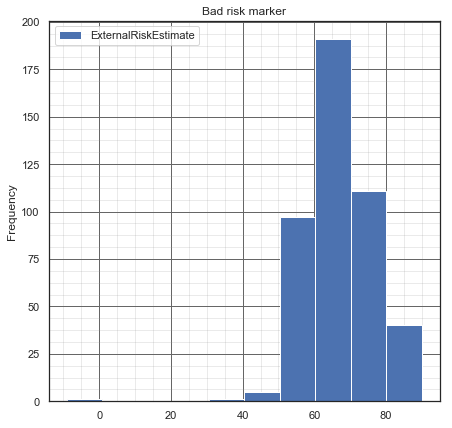

In [97]:
df[df['RiskPerformance'] == "Bad"][['ExternalRiskEstimate']].plot(kind='hist',figsize=(7,7), bins=10, title="Bad risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

 -  We can see from the above box plots that the median external risk estimate for a good outcome is about 76 and for a bad outcome it is 66. The difference is maybe not a big as expected. A larger number is more positive
 -  This can also be seen from the above histograms. In the upper range of the external risk estimate (80+) there are very few with a bad outcome.
 -  There is a clear trend here so we can say the external risk estimate does have an impact on the overall risk outcome.

4. Plot Total Number trade vs Risk marker

<Figure size 432x288 with 0 Axes>

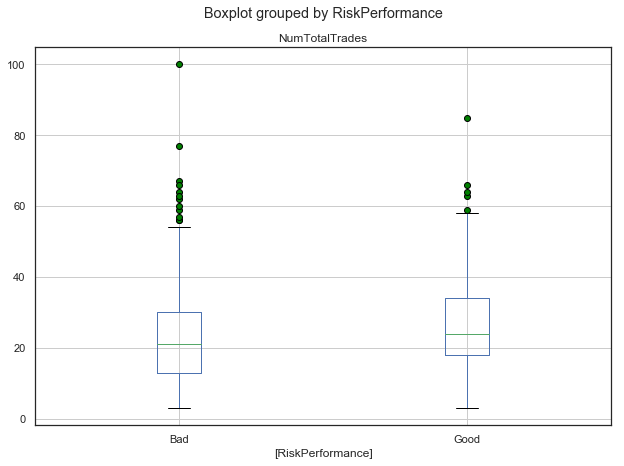

In [98]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

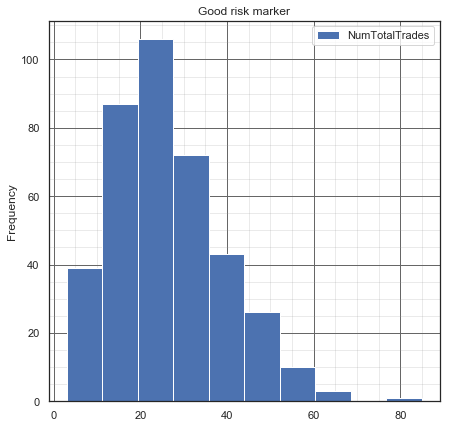

In [99]:
df[df['RiskPerformance'] == "Good"][['NumTotalTrades']].plot(kind='hist',figsize=(7,7), bins=10, title="Good risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

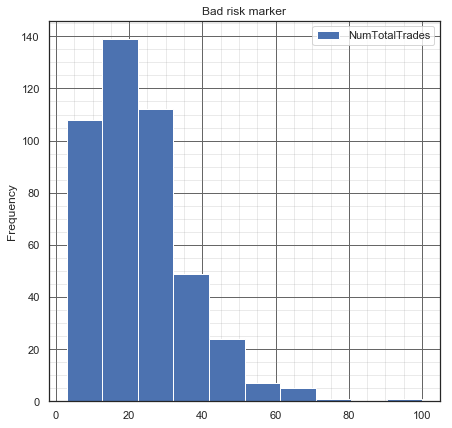

In [100]:
df[df['RiskPerformance'] == "Bad"][['NumTotalTrades']].plot(kind='hist',figsize=(7,7), bins=10, title="Bad risk marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

 -  We can see from the above box plots that the median number of accounts opened with a good outcome is 23 and for a bad outcome it is 20. The difference is minimal
 -  This can also be seen from the above histograms. There is no clear difference between both
 -  There is no clear trend here so we can say the number of trades does not have a big effect on the risk outcome

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

- Continuous vs Continuous
    - We picked a number of continuous features that we would expect to have a stronger impact on risk outcome however we do not see many features with a strong connection to each other.
    - We see a connection between the external risk estimate and the net fraction of trades with burden and also the percentage of trades never delinquent. 
    -  This does not give us much additional information only that the external risk estimate looks like a good marker
- Categorical vs Categorical
    - We see no strong connection between the type of delinquency and the likelihood of a bad risk outcome for both delinquencies in the last 12 months and in the total lifetime. 
    - If the delinquency is 30 days late or 90 days late they appear to be treated the same. 
    - We do see a significant drop in the likelihood of a good risk outcome if the entry has been delinquent. This is as expected and makes a strong case for having a binary feature, marking if a entry has been delinquent or not.
- Continuous vs Categorical
    - There is a strong connection between % utilisation, months since most recent delinquency and external risk estimate.
    - The higher the % utilisation, a more recent delinquency and a lower external risk estimate are the likely predictors of a bad risk outcome.



# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- DelqEver : Measures if a entry during their history has ever been delinquent
- From analysis of the data if an entry has been delinquent, the type of delinquency is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, delinquent or not

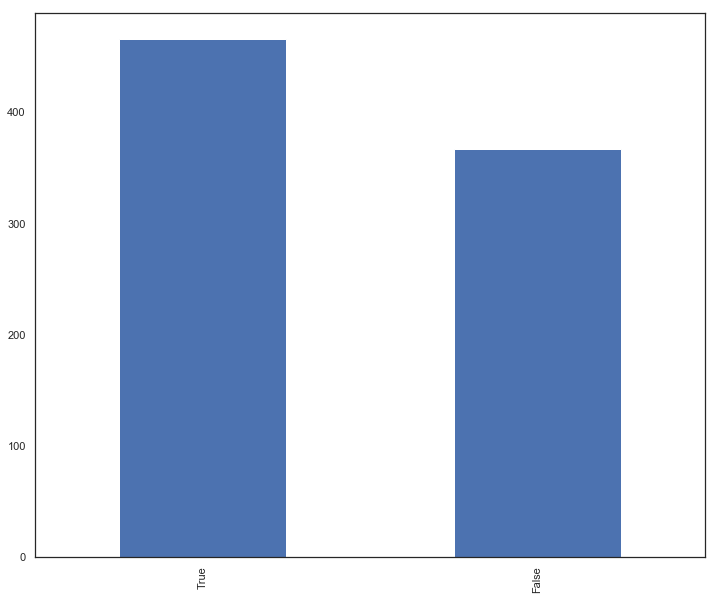

In [101]:
#df['DelqEver'] = df['MaxDelq2PublicRecLast12M']!=7
df['DelqEver'] = df['MaxDelqEver']!=7
df['DelqEver'] = df['DelqEver'].astype('category')
df["DelqEver"].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot DelqEver

DelqEver
Index 	 Count
True 	 466
False 	 367


(0, 100)

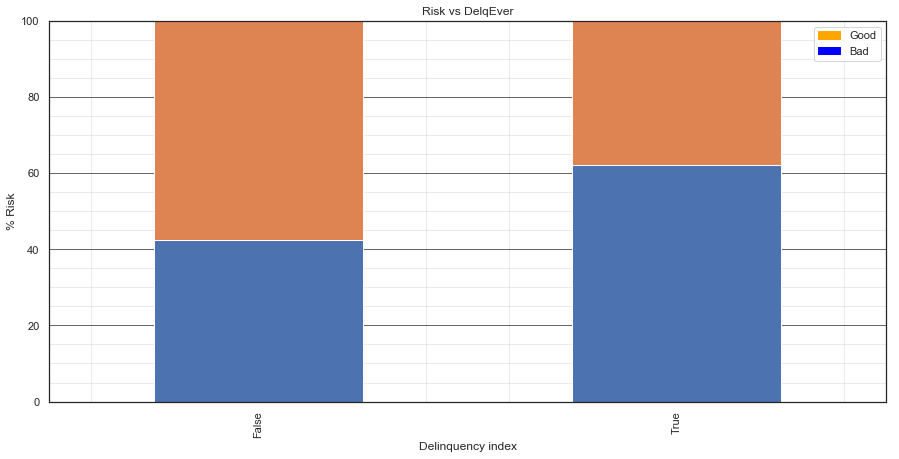

In [102]:
#Using code from the module lab
maxDelqEver = pd.unique(df['DelqEver'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('DelqEver')
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df['DelqEver'] == i].count()['RiskPerformance']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DelqEver','RiskPerformance']].groupby(['DelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk vs DelqEver", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Delinquency index")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

#### **New feature 2** 
- DelqLast12M : Measures if a entry during the last 12 months has ever been delinquent
- From analysis of the data if an entry has been delinquent, the type of delinquency is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, delinquent or not in last 12 months

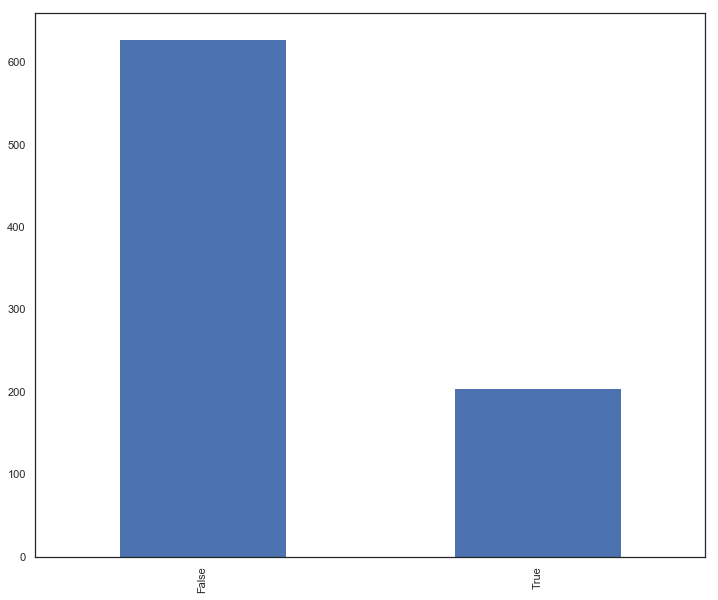

In [103]:
df['DelqLast12M'] = df['MaxDelq2PublicRecLast12M']!=7
df['DelqLast12M'] = df['DelqLast12M'].astype('category')
df["DelqLast12M"].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot DelqLast12M

DelqLast12M
Index 	 Count
False 	 628
True 	 205


(0, 100)

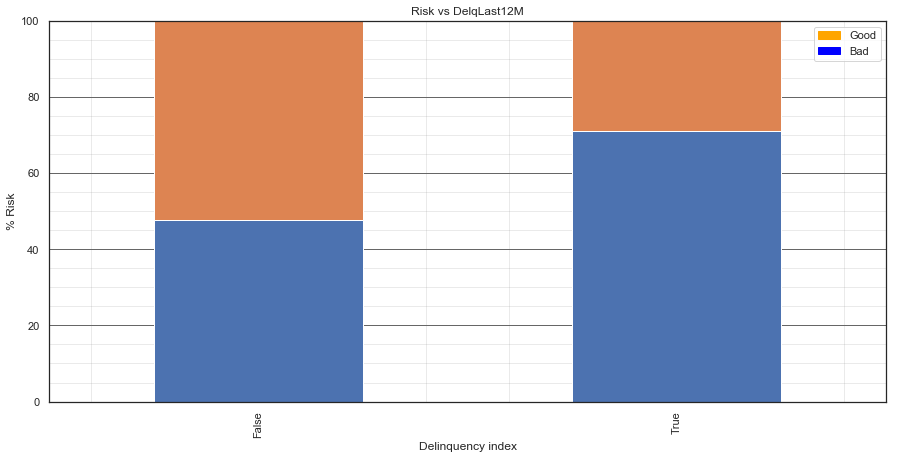

In [104]:
#Using code from the module lab
maxDelqEver = pd.unique(df["DelqLast12M"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("DelqLast12M")
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df["DelqLast12M"] == i].count()['RiskPerformance']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df["DelqLast12M"] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent',"DelqLast12M",'RiskPerformance']].groupby(["DelqLast12M",'RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk vs DelqLast12M", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Delinquency index")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

#### **New Feature 3**
- PercentSatisfactoryTrades: Measure the Percentage of satisfactory trades
- Will allow a comparison between the definition of a satisfactory trade vs a trade never delinquent
- Would expect them to be equivalent but they are not
- This derived feature brings up number of questions that will need to be address by the domain expert. We need to find the reason for the difference between the two. 

In [105]:
df['PercentSatisfactoryTrades'] = round(((df['NumSatisfactoryTrades'] / df['NumTotalTrades']) *100),0)
df[['PercentSatisfactoryTrades','NumSatisfactoryTrades','NumTotalTrades']].head()

,PercentSatisfactoryTrades,NumSatisfactoryTrades,NumTotalTrades
1,100.0,43,43
2,100.0,28,28
3,96.0,22,23
4,54.0,15,28
5,100.0,27,27


In [106]:
df[['PercentSatisfactoryTrades','PercentTradesNeverDelq']].head()
# find the number of entries where % satisfactory trades == % trades never delinquent
print("Number of trades where %satisfactory == % never delinquent:",df[df['PercentSatisfactoryTrades']==df['PercentTradesNeverDelq']].shape[0])
print("Number of trades where %satisfactory < % never delinquent:",df[df['PercentSatisfactoryTrades']<df['PercentTradesNeverDelq']].shape[0])
print("Number of trades where %satisfactory > % never delinquent:",df[df['PercentSatisfactoryTrades']>df['PercentTradesNeverDelq']].shape[0])

Number of trades where %satisfactory == % never delinquent: 268
Number of trades where %satisfactory < % never delinquent: 332
Number of trades where %satisfactory > % never delinquent: 233


#### **New Feature 4**
- NumTradesWBalance: Number of trades with balance = (percentage of trades with a balance * number  total trades) / 100
- This derived feature should return an integer but it is likely the original % figure has been rounded.
- Will use floor division to be conservative (ensure int values returned) to account for this
- We can see that num revolving trades + num install trades + num bank trades != num total trades
    -  Therefore we need to estimate number trades with balance using percentage of trades with balance and total trades as it will give a more accurate value

In [107]:
df['NumTradesWBalance'] = (df['PercentTradesWBalance'] * df['NumTotalTrades'])//100
df[['NumTradesWBalance', 'PercentTradesWBalance', 'NumTotalTrades']].head()

,NumTradesWBalance,PercentTradesWBalance,NumTotalTrades
1,19,45,43
2,23,83,28
3,6,27,23
4,28,100,28
5,13,50,27


In [108]:
df[['NumRevolvingTradesWBalance','NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization','NumTotalTrades']].head()

,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,NumTotalTrades
1,7,2,1,43
2,3,2,1,28
3,2,1,0,23
4,2,3,1,28
5,5,1,0,27


### Check logical integrity of derived data 

 - Check if any entries have a delinquency in last 12 months and no delinquency ever (impossible)

In [109]:
test_11 = df[['DelqLast12M','DelqEver']][df['DelqLast12M']==True][df['DelqEver']==False]
print("Number of rows failing the test: ", test_11.shape[0])
test_11.head()

Number of rows failing the test:  0


,DelqLast12M,DelqEver


In [110]:
df = df.drop(test_11.index)

- checking if any entries have a percent trades never delinquent < 100% and no delinquency ever (impossible)

In [111]:
test_12 = df[['PercentTradesNeverDelq','DelqEver']][df['PercentTradesNeverDelq']<100][df['DelqEver']==False]
print("Number of rows failing the test: ", test_12.shape[0])
test_12.head()

Number of rows failing the test:  6


,PercentTradesNeverDelq,DelqEver
577,96,False
616,97,False
652,94,False
796,95,False
837,95,False


In [112]:
df = df.drop(test_12.index)

- checking if any entries have a percent trades delinquent <100% and no delinquency ever (impossible)

In [113]:
test_13 = df[['MSinceMostRecentDelq','DelqEver']][df['MSinceMostRecentDelq']<125][df['DelqEver']==False]
print("Number of rows failing the test: ", test_13.shape[0])
test_13.head()

Number of rows failing the test:  361


,MSinceMostRecentDelq,DelqEver
2,123,False
3,123,False
4,123,False
5,123,False
10,123,False


### To finish - Print data types, descriptive tables, save to csv

In [114]:
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

Print continuous statistics

In [115]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,827.0,71.575574,10.307266,-9.000000,64.000000,71.000000,80.000000,93.000000
MSinceOldestTradeOpen,827.0,199.964933,98.919391,8.000000,133.000000,184.000000,256.500000,789.000000
MSinceMostRecentTradeOpen,827.0,9.053204,10.491647,0.000000,3.000000,6.000000,11.000000,84.000000
AverageMInFile,827.0,76.386941,32.453285,4.000000,54.000000,74.000000,95.000000,217.000000
NumSatisfactoryTrades,827.0,21.725514,12.047660,1.000000,13.000000,20.000000,29.000000,78.000000
NumTrades60Ever2DerogPubRec,827.0,0.596131,1.295881,0.000000,0.000000,0.000000,1.000000,14.000000
NumTrades90Ever2DerogPubRec,827.0,0.371221,1.025720,0.000000,0.000000,0.000000,0.000000,14.000000
PercentTradesNeverDelq,827.0,91.871826,11.721465,33.000000,89.000000,96.000000,100.000000,100.000000
MSinceMostRecentDelq,827.0,66.660218,52.279834,0.000000,12.000000,61.000000,123.000000,123.000000
NumTotalTrades,827.0,24.484885,13.165300,3.000000,15.000000,23.000000,32.000000,100.000000


In [116]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,827,2,Bad,441
MaxDelq2PublicRecLast12M,827,6,7,622
MaxDelqEver,827,6,7,361
DelqEver,827,2,True,466
DelqLast12M,827,2,False,622


In [117]:
# Write the cleaned dataframe to a csv file
df.to_csv('CreditRisk_1-3_cleaned_new_features.csv', index=False)